## Module 4 Final Project:

# **Time Series Analysis of Zillow Real Estate Prices**

### Student Name: **Matthew Onstott**
### Program: **Online** (Self-Paced)
### Instructor: 
### Date:

-------------------------------------------------------------------------


## Table of Contents:

- [1. Context](#1.-Project-Context)
- [2. Solution Framework](#2.-Solution-Framework)
- [3. Business Issue Understanding](#3.-Business-Issue-Understanding)
- [4. Data Understanding](#4.-Data-Understanding)
- [5. Data Preparation](#5.-Data-Preparation)
- [6. Modeling](#6.-Modeling)
- [7. Validation](#7.-Validation)
- [8. Visualization](#8.-Visualization)
- [9. Conclusion](#9.-Conclusion)

## 1. Project Context
This section provides information relevant to the project and describes assumptions made within the solution.

### Data Provider: 

Zillow online real estate database company.

### Dataset: 

*zillow_data.csv* , a set of [Zillow Research Page](https://www.zillow.com/research/data/) data.

### Goal: 

To put Time Series Analysis skills to the test; complete a common real-world Time-Series Modeling task; forecast real estate prices of various zipcodes using data from the Zillow Research Page; and, demonstrate quality and thoughtfulness in an overall investment recommendation for the top 5 best zipcodes for a fictional real-estate firm.

### Fictional Investment Firm: 

Gygax Real Estate

[[table of contents]](#Table-of-Contents:)

## 2. Solution Framework

The data science process used within this project is the <strong>CR</strong>oss-<strong>I</strong>ndustry <strong>S</strong>tandard <strong>P</strong>rocess for <strong>D</strong>ata <strong>M</strong>ining (CRISP-DM). This framework places great value on business issue understanding. Business issue understanding is paramount for defining what factors within a zipcode make it most suitable for investment. 

The phases of CRISP-DM:

- Business Issue Underestanding
- Data Understanding
- Data Preparation
- Analysis/Modeling
- Validation
- Presentation/Visualization

<img src='CRISP-DM.jpg' />


[[table of contents]](#Table-of-Contents:)

## 3. Business Issue Understanding

In the business issue understanding phase of CRISP-DM we determine what the companys desires. This step will define what portion of the dataset is of interest and how it may be evaluated.

### Activities:
- Review the business requirements

### Gygax Real Estate
The company provided an overview of its operations and interests.

#### Operating Region: 
Gygax Real Estate operates out of the American Southwest. This includes the States of Nevada, Utah, Arizona, Colorado, and New Mexico.

#### Market Performance:
Gygax Real Estate refuses to invest in metro areas with a recent history of low performance. For the purposes of this study, it is only interested in the top 10 metro regions, as defined by their recent 2-year history.

#### Recession Recovery:
Gygax Real Estate is wary of investment in ZIP Codes that struggled following the 2007-2009 Great Recession. Gygax views properties that are below the Top 25% in recovery growth as too risky for investment.

#### Recession Volatility:
Gygax Real Estate is also wary of investment in ZIP Codes that struggled during the 2007-2009 Great Recession. Gygax views properties that were above the Bottom 25% in volatility during the recession as too risky for investment.

#### Final Selection:
Gygax Real Estate desires to pivot in a data-driven direction. As long as the requirements it has outlined are met, the selection of the final five ZIP Codes is left to the discretion of the investigation team.


[[table of contents]](#Table-of-Contents:)


## 4. Data Understanding

In the data understanding phase of CRISP-DM we take a close look at the data that is available for mining. This step is critical for avoiding problems during data preparation.

### Activities:
- Import Libraries
- Load the Data File
- Inspect Its Contents
- Handle Raw Data Issues
- Create Useful Features
- Filter the Dataset

Import libraries and packages necessary for the solution.

In [3]:
# import necessary libraries and packages
import numpy as np
import pandas as pd
from pandas import Series
from scipy import stats
from math import sqrt
from sklearn.metrics import mean_squared_error
import itertools
import time

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
%matplotlib inline
plt.style.use('seaborn-dark-palette')
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

!pip install pmdarima
import pmdarima as pm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
import warnings
from warnings import catch_warnings
from warnings import filterwarnings
warnings.filterwarnings('ignore')

     |████████████████████████████████| 1.5MB 3.0MB/s 


In [4]:
# requirement for accessing data within Google Colab
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Load the Zillow CSV file located in this repository.

In [5]:
# load the zillow data file
df = pd.read_csv('/content/drive/My Drive/zillow_data.csv')
print('Raw dataset info:\n')
print(df.info())
print('\nSample rows:')
df.head()

Raw dataset info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB
None

Sample rows:


RegionID  RegionName      City State  ...  2018-01  2018-02  2018-03  2018-04
0     84654       60657   Chicago    IL  ...  1024400  1030700  1033800  1030600
1     90668       75070  McKinney    TX  ...   318100   319600   321100   321800
2     91982       77494      Katy    TX  ...   321200   323000   326900   329900
3     84616       60614   Chicago    IL  ...  1302700  1306400  1308500  1307000
4     93144       79936   El Paso    TX  ...   120300   120500   121000   121500

[5 rows x 272 columns]

There are 14,723 rows and 272 columns in the raw dataset. Most of these columns are numeric types. Only 4 columns are categorical.

Describe the data contents in more detail.

In [6]:
# describe the raw dataset

# unique
print('Number of Unique')
print('-'*20)
print('RegionID:', df.RegionID.nunique())
print('RegionName:', df.RegionName.nunique())
print('City:', df.City.nunique())
print('State:', df.State.nunique())
print('Metro:',df.Metro.nunique())
print('CountyName:', df.CountyName.nunique())
print('SizeRank:', df.SizeRank.nunique())

# missing values
print('\nSample of Columns with Missing Values')
print('-'*40)
print(df.isna().sum().sort_values(ascending=False)[:10])

# columns with missing
col_null = 0
col_not = 0
for i in df.columns:
    if df[i].isna().sum() > 0:
        col_null += 1
    else:
        col_not += 1
print('\nNumber of Columns with Missing Values')
print('-'*30)
print('Any:', col_null, '\nNone:', col_not)

Number of Unique
--------------------
RegionID: 14723
RegionName: 14723
City: 7554
State: 51
Metro: 701
CountyName: 1212
SizeRank: 14723

Sample of Columns with Missing Values
----------------------------------------
Metro      1043
1997-03    1039
1996-07    1039
1997-06    1039
1997-02    1039
1997-01    1039
1996-12    1039
1996-11    1039
1996-10    1039
1996-09    1039
dtype: int64

Number of Columns with Missing Values
------------------------------
Any: 220 
None: 52


There are an equal number of **RegionID**, **RegionName**, and **SizeRank** (the dataset obervations, 14723). 

**RegionID** and **RegionName** are in a 5 digit format.

**RegionName** maps to ZIP Codes.

There are 7554 unique values for **City**, 51 for **State**, 701 for **Metro**, and 1212 for **CountyName**.

Date information is in a YYYY-DD format. Each month-year combination is its own column with median housing price as its values.

There are 220 columns with missing values and 52 columns without them. One of the columns with missing values is **Metro**, the other 219 are month-year date columns.

Next, begin filtering based off of information learned from the business issue understanding phase. 

Gygax Real Estate operates out of the American Southwest. This includes the States of Nevada, Utah, Arizona, Colorado, and New Mexico. As a first filtering step, restrict the dataset to these States.

In [7]:
# Restrict dataset to states in the Southwest: Nevada, Utah, Arizona, Colorado, and New Mexico
sw_states = ['NV', 'UT', 'AZ', 'CO', 'NM']
df_sw = df[df.State.isin(sw_states)]
print('Shape of the Southwest dataset:', df_sw.shape)
print('Percent of raw data removed:'+' {:.2%}'.format((df.shape[0] - df_sw.shape[0])/df.shape[0]))
print('\nZIP Code Records by State')
print('-'*30)
df_sw.State.value_counts()

Shape of the Southwest dataset: (763, 272)
Percent of raw data removed: 94.82%

ZIP Code Records by State
------------------------------


CO    249
AZ    230
UT    121
NV    103
NM     60
Name: State, dtype: int64

Since Gygax is only interested in real estate for States in the Southwest, we are able to eliminate nearly 95% of observations from the start. This will save us a lot of time identifying the 5 best ZIP Codes for investment.

In addition to specifying its operating region, Gygax has also specified that it is wary of Metro areas that have a history of low performance. It has firmly stated that it is only interested in the Top 10 Metro regions by Median Housing Price, as defined by their recent 2-year history.

To continue filtering, group data by Metro.

In [8]:
# group remaining dataset by metro
print('Number of obs. with Metro field missing:', df_sw.Metro.isna().sum())
df_sw.Metro.fillna('Missing Value', inplace=True) # handle missing values
print('Number missing after Imputation:', df_sw.Metro.isna().sum())

print('\nMetro view:')
df_metro = df_sw.groupby(['Metro']).mean()
df_metro.head()

Number of obs. with Metro field missing: 39
Number missing after Imputation: 0

Metro view:


RegionID    RegionName  ...        2018-03        2018-04
Metro                                    ...                              
Alamogordo   95637.000000  88352.000000  ...   92200.000000   93700.000000
Albuquerque  95293.428571  87085.964286  ...  224875.000000  225964.285714
Boulder      93374.357143  80362.357143  ...  563014.285714  566771.428571
Carson City  95954.800000  89703.800000  ...  333720.000000  338180.000000
Cedar City   94656.500000  84720.500000  ...  206650.000000  208100.000000

[5 rows x 268 columns]

Visualize the performance of the Top 10 Metros in averages over 2-years and against time.

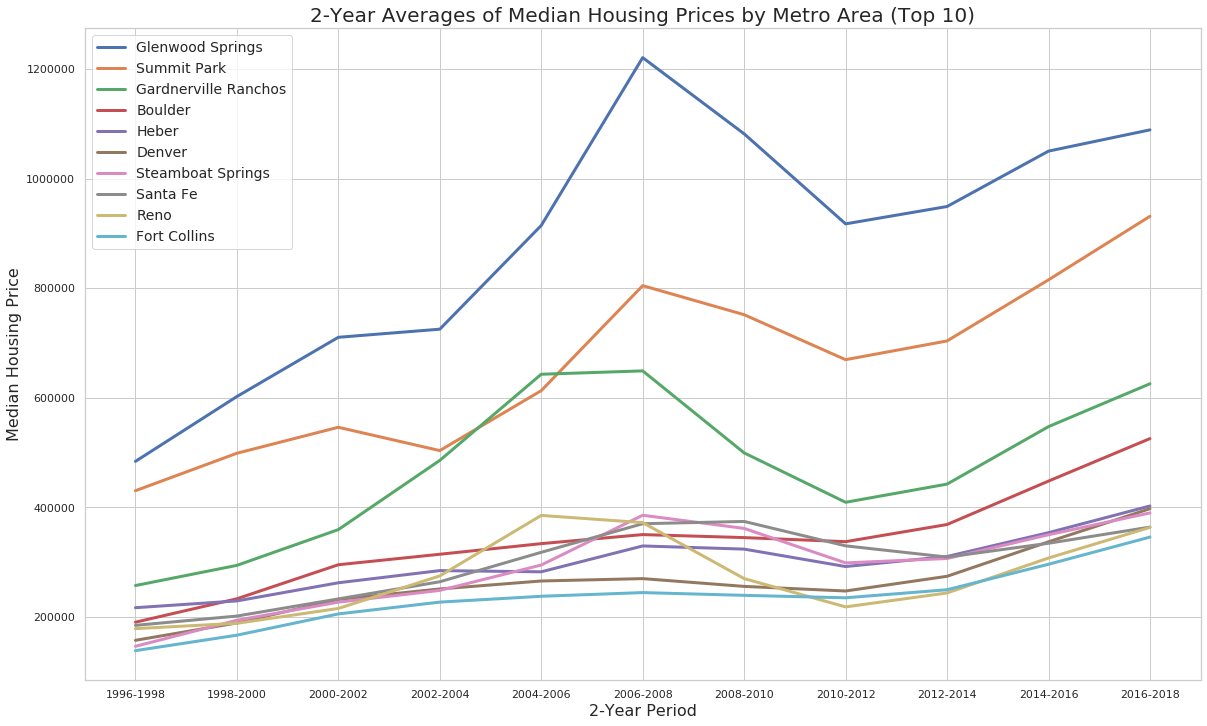

Percent of raw data removed: 98.72%

ZIP Code Records by State
------------------------------
CO    149
NV     27
NM      8
UT      4
Name: State, dtype: int64

ZIP Code Records by Metro
------------------------------
Denver                  106
Reno                     19
Fort Collins             16
Boulder                  14
Glenwood Springs          9
Gardnerville Ranchos      8
Santa Fe                  8
Steamboat Springs         4
Heber                     2
Summit Park               2
Name: Metro, dtype: int64


In [9]:
# create column for the mean of median housing prices in 2-year intervals
df_metro['1996-1998'] = df_metro.loc[:, '1996-04':'1998-12'].mean(axis=1)

for year in range(1998, 2016, 2):
    df_metro[str(year)+'-'+str(year+2)] = df_metro.loc[:, str(year)+'-01':str(year+2)+'-12'].mean(axis=1)
    
df_metro['2016-2018'] = df_metro.loc[:, '2016-01':'2018-04'].mean(axis=1)

df_metro.sort_values(by='2016-2018', ascending=False, inplace=True)

# plot
top10 = df_metro.loc[:, '1996-1998':'2016-2018'][:10]
plt.figure(figsize=(20, 12))
plot = plt.plot(top10.columns, top10.T, linewidth=3)
plt.legend(iter(plot), list(top10.index), prop={'size':14})
plt.title("2-Year Averages of Median Housing Prices by Metro Area (Top 10)", fontsize=20)
plt.ylabel("Median Housing Price", fontsize=16)
plt.xlabel("2-Year Period", fontsize=16)
plt.show();

# results by state and metro
df_top10m = df_sw[df_sw.Metro.isin(top10.index)]
metro_in = df_top10m.State.value_counts().sum()
print('Percent of raw data removed:'+' {:.2%}'.format((df.shape[0] - metro_in)/df.shape[0]))
print('\nZIP Code Records by State')
print('-'*30)
print(df_top10m.State.value_counts())

print('\nZIP Code Records by Metro')
print('-'*30)
print(df_top10m.Metro.value_counts())

The Top 10 Metros have an average Median Housing Price above $ 200,000. At the State level, ZIP Codes within the Top 10 Metros are mostly located in Colorado. At the Metro level, there are more ZIP Codes in Denver than any of the other 9 locations. At this point the raw dataset has been reduced by nearly 99%. 

There is one more filtering criteria provided by Gygax Real Estate. Along with its interest in recent growth, the company is wary of ZIP Codes that fared poorly during the 2007 - 2009 Great Recession. This financial crisis was partially brought about by the housing bubble affecting over half of the United States. Gygax views properties that are below the Top 25\% in recovery growth and are below the Bottom 25\% in volatility during the recession as too risky for investment. 

The recession officially lasted from December 2007 through June 2009. In order to meet the company's needs, let's build features to look at date ranges during and following the recession. Let's start with post-recession growth.

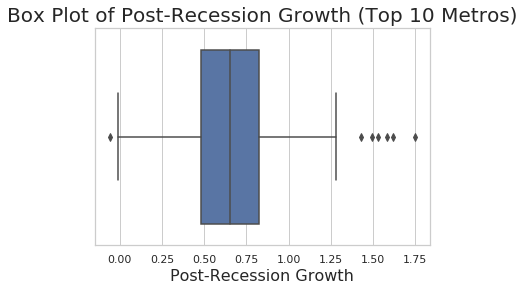

Percent of raw data removed: 99.68%

ZIP Code Records by State
------------------------------
CO    43
NV     4
Name: State, dtype: int64

ZIP Code Records by Metro
------------------------------
Denver          40
Reno             4
Boulder          2
Fort Collins     1
Name: Metro, dtype: int64


In [10]:
# Calculate growth over the past 10 years and select the top 25%
df_top10m['PostRecessionGrowth'] = (df_top10m['2018-04'] - df_top10m['2009-06']) / df_top10m['2009-06']
postgrowth25 = df_top10m.PostRecessionGrowth.quantile(0.75)
df_pg = df_top10m[df_top10m.PostRecessionGrowth > postgrowth25]

# boxplot of post-recession growth
ax = sns.boxplot(df_top10m.PostRecessionGrowth)
plt.title('Box Plot of Post-Recession Growth (Top 10 Metros)', fontsize=20)
plt.xlabel('Post-Recession Growth', fontsize=16)
plt.show();

# results by state and metro
print('Percent of raw data removed:'+' {:.2%}'.format((df.shape[0] - df_pg.shape[0])/df.shape[0]))
print('\nZIP Code Records by State')
print('-'*30)
print(df_pg.State.value_counts())

print('\nZIP Code Records by Metro')
print('-'*30)
print(df_pg.Metro.value_counts())

The Metros in the Top 25% of post-recession recovery have values for the growth ratio above 0.83. At the State level, ZIP Codes within the Top 25% are located in Colorado and Nevada. At the Metro level, there are ZIP Codes in Denver, Reno, Boulder, and Fort Collins. At this point the raw dataset has been reduced by nearly 99.7%.

Let's finish the filtering step by building a feature looking at performance during the Great Recession, from December 2007 through June 2009.

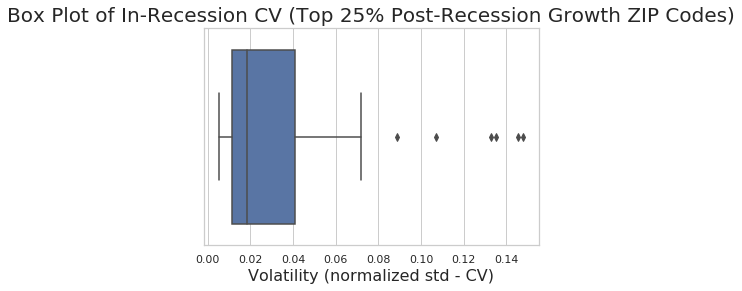

Percent of raw data removed: 99.92%

ZIP Code Records by State
------------------------------
CO    12
Name: State, dtype: int64

ZIP Code Records by Metro
------------------------------
Denver          10
Boulder          1
Fort Collins     1
Name: Metro, dtype: int64


In [11]:
# calculate volatility over the recession and select the bottom 25% 
df_pg['RecessionCV'] = df_pg.loc[:,'2007-12':'2009-06'].std(skipna=True, axis=1) / \
    df_pg.loc[:,'2007-12':'2009-06'].mean(skipna=True, axis=1)
inrecession25 = df_pg.RecessionCV.quantile(0.25)
df_ir = df_pg[df_pg.RecessionCV < inrecession25]

# boxplot of within-recession coefficient of variation
ax = sns.boxplot(df_pg.RecessionCV)
plt.title('Box Plot of In-Recession CV (Top 25% Post-Recession Growth ZIP Codes)', fontsize=20)
plt.xlabel('Volatility (normalized std - CV)', fontsize=16)
plt.show();

# results by state and metro
print('Percent of raw data removed:'+' {:.2%}'.format((df.shape[0] - df_ir.shape[0])/df.shape[0]))
print('\nZIP Code Records by State')
print('-'*30)
print(df_ir.State.value_counts())

print('\nZIP Code Records by Metro')
print('-'*30)
print(df_ir.Metro.value_counts())

The Metros in the Bottom 25% of within-recession volatility have values for the coefficient of variation below 0.01. At the State level, ZIP Codes within the Bottom 25% are located in Colorado. At the Metro level, there are ZIP Codes in Denver, Fort Collins, and Boulder. Now there are 12 viable ZIP Codes from which to choose. At this point the raw dataset has been reduced by over 99.9%.

Understanding of the dataset based on criteria learned from the business issue understanding phase is complete. Before moving onto the next phase, let's review the filtered datset.

In [12]:
# data understanding phase output dataset
df_ir

RegionID  RegionName  ... PostRecessionGrowth RecessionCV
1248     93296       80220  ...            0.842088    0.009496
1387     93288       80211  ...            1.025945    0.005337
1843     93282       80205  ...            1.239524    0.009820
1940     93280       80203  ...            0.865818    0.006693
2491     93445       80521  ...            0.859587    0.008083
2796     93249       80120  ...            0.851037    0.010496
2926     93215       80026  ...            0.830073    0.006438
3186     93220       80033  ...            0.985247    0.009728
3800     93298       80222  ...            0.921292    0.011170
5210     93300       80224  ...            0.881623    0.009731
5505     93194       80002  ...            1.014964    0.010925
6170     93250       80121  ...            0.840383    0.007463

[12 rows x 274 columns]


[[table of contents]](#Table-of-Contents:)

## 5. Data Preparation

In the data preparation phase of CRISP-DM we operate on our data to get it in appropriate shape for modeling. This step can often be the most time-consuming part of the framework.


### Activities:

- Drop Unnecessary Features
- Check for Missing Values
- Melt Dataset from Wide to Long Format
- Check for Trends
- Test for Stationarity
- Assess Differencing and Correlations

Start data preparation phase by renaming the **RegionName** column to match its contents, dropping unnecessary columns, and checking for missing values.

In [13]:
# rename RegionName column
df_ir.rename(columns={'RegionName': 'ZIP'}, inplace=True)
df_ir['ZIP'] = df_ir['ZIP'].astype(str)

# drop unnecesary columns
df_ir.drop('RegionID', axis=1, inplace=True)
df_ir.drop('SizeRank', axis=1, inplace=True)

# Deal with missing values
print('Number of Missing Values:', df_ir.isna().sum().sum())

Number of Missing Values: 0


There are no missing values in the dataset.

Next, create a function to reshape the data from wide format to long format.

In [0]:
# function to reshape from Wide to Long format
def melt_data(df):
    
    melted = pd.melt(df, id_vars=['ZIP', 'City', 'State', 'Metro', 'CountyName', 'PostRecessionGrowth', 'RecessionCV'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted.set_index('time', inplace=True)
    melted = melted.dropna(subset=['value'])
    
    return melted

Use the melt function on the filtered dataset.

In [15]:
# use melt function on dataset
df_ts = pd.DataFrame()
zipcodes = list(df_ir.ZIP.values)
for zipcode in zipcodes:
    
    new = melt_data(df_ir[df_ir.ZIP == zipcode])
    df_ts = pd.concat([df_ts, new])

df_ts.sort_index(inplace=True)
print('Prepared dataset info:\n')
print(df_ts.info())
print('\nSample rows:')
df_ts.head()

Prepared dataset info:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3180 entries, 1996-04-01 to 2018-04-01
Data columns (total 8 columns):
ZIP                    3180 non-null object
City                   3180 non-null object
State                  3180 non-null object
Metro                  3180 non-null object
CountyName             3180 non-null object
PostRecessionGrowth    3180 non-null float64
RecessionCV            3180 non-null float64
value                  3180 non-null float64
dtypes: float64(3), object(5)
memory usage: 223.6+ KB
None

Sample rows:


ZIP          City  ... RecessionCV     value
time                             ...                      
1996-04-01  80220        Denver  ...    0.009496  138500.0
1996-04-01  80026     Lafayette  ...    0.006438  143900.0
1996-04-01  80521  Fort Collins  ...    0.008083  113900.0
1996-04-01  80033   Wheat Ridge  ...    0.009728  127600.0
1996-04-01  80203        Denver  ...    0.006693  134000.0

[5 rows x 8 columns]

The 12 ZIP Codes in a wide format output from our data understanding phase have been melted into a long format containing 3,180 records. 

Inspect the long format data for trends over time.

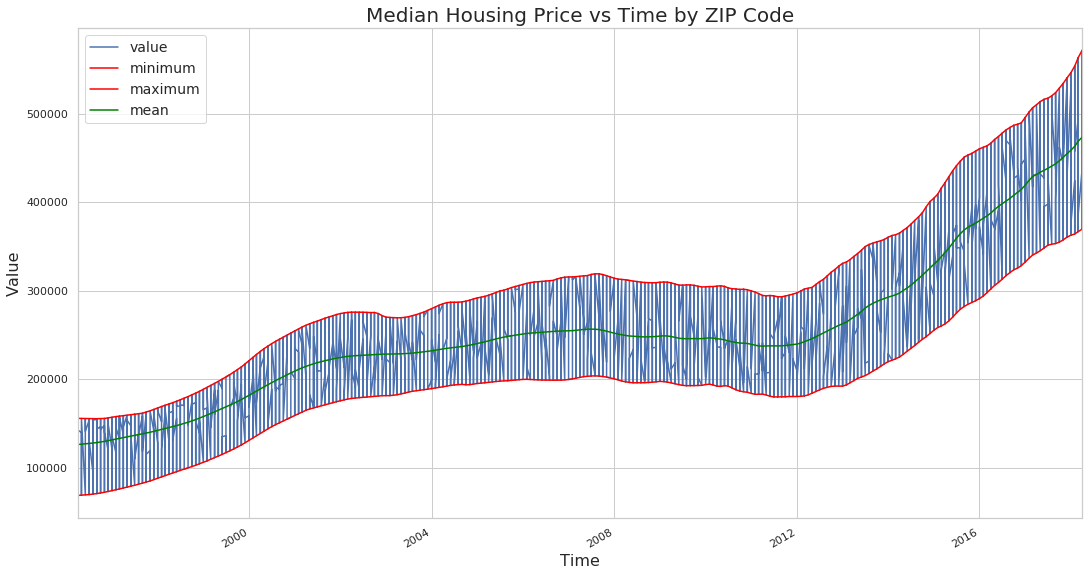

In [16]:
# trends check
df_ts.value.plot(figsize=(18, 10))
minimum = df_ts.groupby('time').aggregate({'value': 'min'})
maximum = df_ts.groupby('time').aggregate({'value': 'max'})
mean = df_ts.groupby('time').aggregate({'value': 'mean'})

plt.plot(minimum, color='red', label="minimum")
plt.plot(maximum, color="red", label="maximum")
plt.plot(mean, color="green", label="mean")

plt.title('Median Housing Price vs Time by ZIP Code', fontsize=20)
plt.ylabel('Value', fontsize=16)
plt.xlabel('Time', fontsize=16)
plt.legend(prop={'size':14})
plt.show();

A stationary time series has properties such as mean, variance, and autocorrelation that are constant over time. Most statistical forecasting methods are based on the assumption that the time series is stationary or can be made stationary through transformations. The plot of minimum, maximum, and mean trend lines shows fluctation over time. We can only conclude that our data is not stationary.

Since stationarity has great effects on sample statistics and model interpretation, let's look at another test for trends within the dataset. First, create a list of the contender locations.

In [17]:
# make a list of the titles to use for visualizations
locations = []
for i, x in df_ir.iterrows():
    
    location = f'{x.City} city - {x.Metro}, {x.State} {x.ZIP}'
    locations.append(location)
    
location_dict = dict(zip(zipcodes, locations))
location_dict

{'80002': 'Arvada city - Denver, CO 80002',
 '80026': 'Lafayette city - Boulder, CO 80026',
 '80033': 'Wheat Ridge city - Denver, CO 80033',
 '80120': 'Littleton city - Denver, CO 80120',
 '80121': 'Centennial city - Denver, CO 80121',
 '80203': 'Denver city - Denver, CO 80203',
 '80205': 'Denver city - Denver, CO 80205',
 '80211': 'Denver city - Denver, CO 80211',
 '80220': 'Denver city - Denver, CO 80220',
 '80222': 'Denver city - Denver, CO 80222',
 '80224': 'Denver city - Denver, CO 80224',
 '80521': 'Fort Collins city - Fort Collins, CO 80521'}

The augmented Dickey–Fuller test (ADF) uses a null hypothesis of a unit root being present in a time series sample. A unit root is a stochastic process feature that causes issues making inferences for time series models.The alternative hypothesis is that the time series is stationary. 

Write a function to perform the ADF test.

In [0]:
# function to perform ADF test
def adf_stationarity_test(ts, w=12):

    rolling_mean = ts.rolling(window=w, center=False).mean()
    rolling_std = ts.rolling(window=w, center=False).std()
    fig = plt.figure(figsize=(16, 6))
    orig = plt.plot(ts, label="Data")
    mean = plt.plot(rolling_mean, label="Rolling Mean")
    std = plt.plot(rolling_std, label="Rolling STD")
    plt.title("Rolling Statistics: Mean and STD")
    plt.legend()
    plt.show(block=False)
    
    adf_test = adfuller(ts)
    adf_output = pd.Series(adf_test[0:4], index = ['Test Statistic', 'p-Value', 'Used Lags', 'Observations'])
    for key, value in adf_test[4].items():
        adf_output['Critical Value (%s)'%key] = value
        
    return(adf_output)

ADF Test for Denver city - Denver, CO 80220 

------------------------------------------------------------------------------------------------------------------------


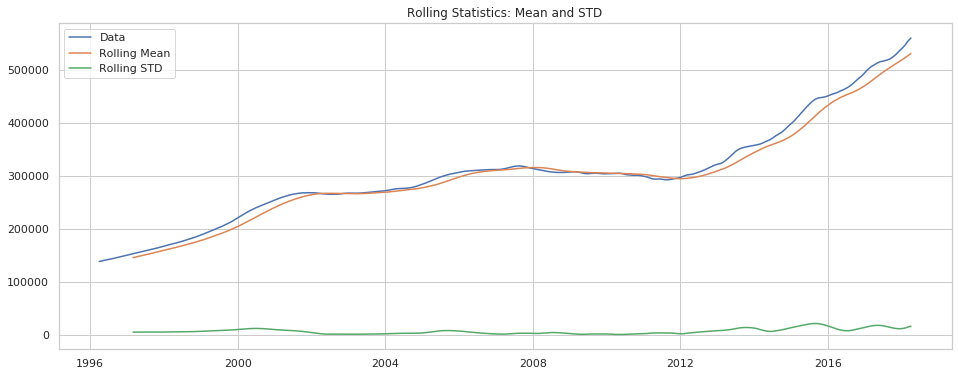

Test Statistic            0.776104
p-Value                   0.991240
Used Lags                15.000000
Observations            249.000000
Critical Value (1%)      -3.456888
Critical Value (5%)      -2.873219
Critical Value (10%)     -2.572994
dtype: float64


ADF Test for Denver city - Denver, CO 80211 

------------------------------------------------------------------------------------------------------------------------


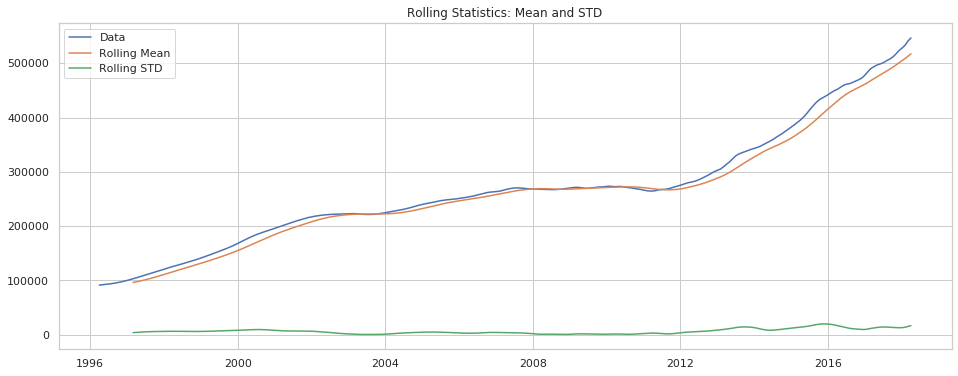

Test Statistic            1.385263
p-Value                   0.997046
Used Lags                15.000000
Observations            249.000000
Critical Value (1%)      -3.456888
Critical Value (5%)      -2.873219
Critical Value (10%)     -2.572994
dtype: float64


ADF Test for Denver city - Denver, CO 80205 

------------------------------------------------------------------------------------------------------------------------


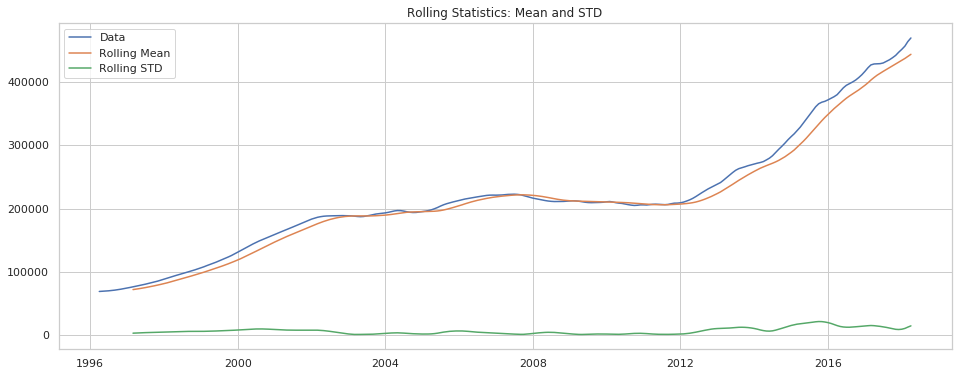

Test Statistic            0.462233
p-Value                   0.983679
Used Lags                15.000000
Observations            249.000000
Critical Value (1%)      -3.456888
Critical Value (5%)      -2.873219
Critical Value (10%)     -2.572994
dtype: float64


ADF Test for Denver city - Denver, CO 80203 

------------------------------------------------------------------------------------------------------------------------


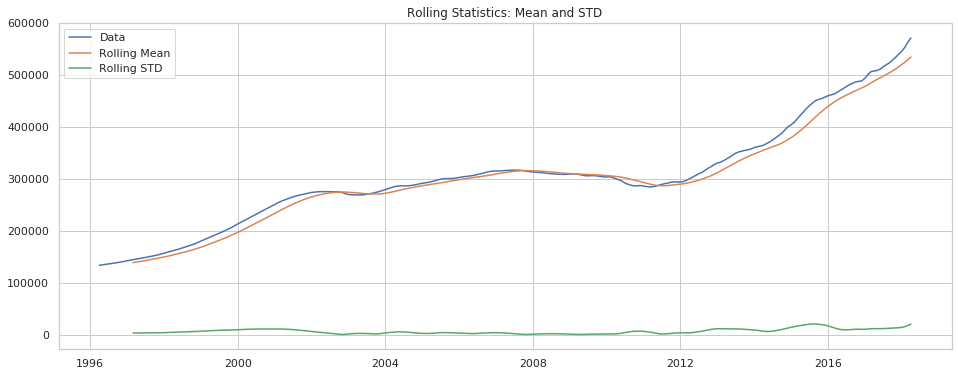

Test Statistic            0.902716
p-Value                   0.993126
Used Lags                16.000000
Observations            248.000000
Critical Value (1%)      -3.456996
Critical Value (5%)      -2.873266
Critical Value (10%)     -2.573019
dtype: float64


ADF Test for Fort Collins city - Fort Collins, CO 80521 

------------------------------------------------------------------------------------------------------------------------


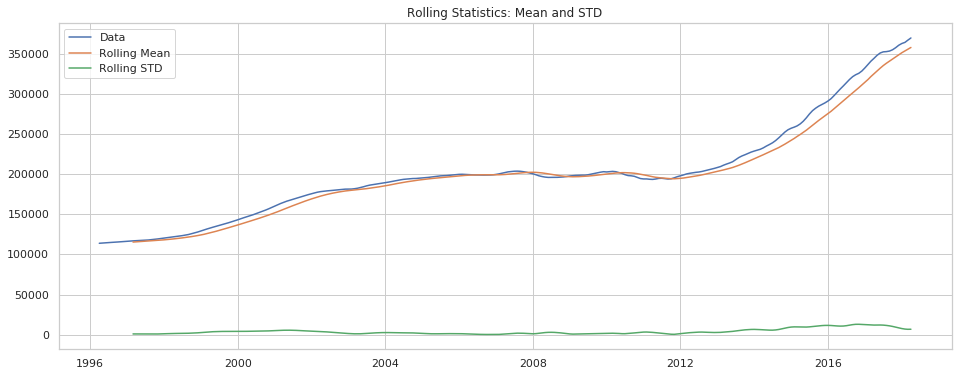

Test Statistic            0.196868
p-Value                   0.972085
Used Lags                15.000000
Observations            249.000000
Critical Value (1%)      -3.456888
Critical Value (5%)      -2.873219
Critical Value (10%)     -2.572994
dtype: float64


ADF Test for Littleton city - Denver, CO 80120 

------------------------------------------------------------------------------------------------------------------------


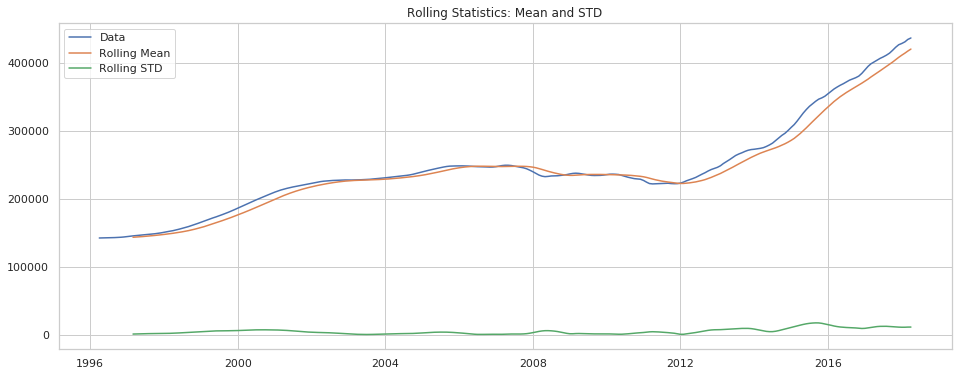

Test Statistic            0.010170
p-Value                   0.959365
Used Lags                 6.000000
Observations            258.000000
Critical Value (1%)      -3.455953
Critical Value (5%)      -2.872809
Critical Value (10%)     -2.572775
dtype: float64


ADF Test for Lafayette city - Boulder, CO 80026 

------------------------------------------------------------------------------------------------------------------------


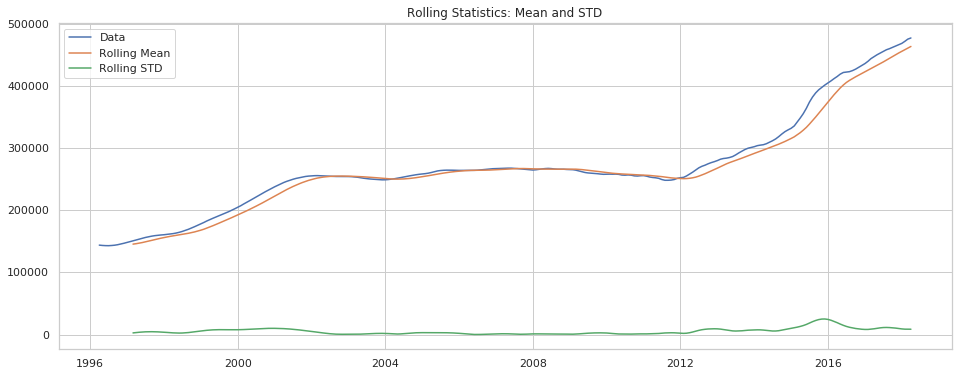

Test Statistic           -0.318685
p-Value                   0.922816
Used Lags                15.000000
Observations            249.000000
Critical Value (1%)      -3.456888
Critical Value (5%)      -2.873219
Critical Value (10%)     -2.572994
dtype: float64


ADF Test for Wheat Ridge city - Denver, CO 80033 

------------------------------------------------------------------------------------------------------------------------


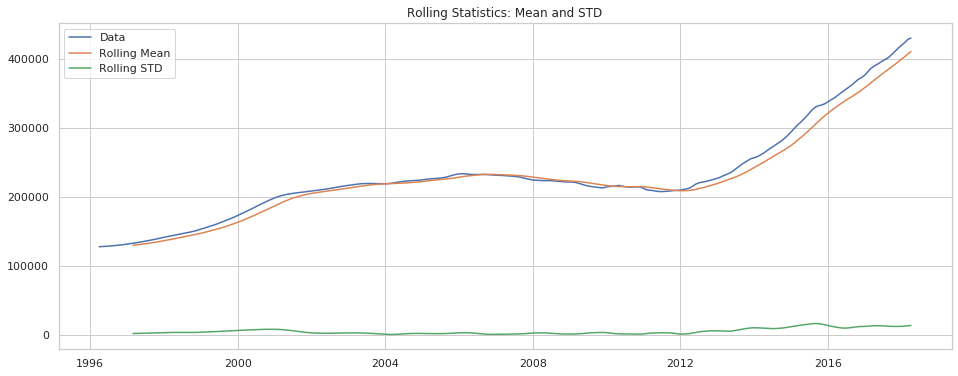

Test Statistic           -0.477580
p-Value                   0.896318
Used Lags                15.000000
Observations            249.000000
Critical Value (1%)      -3.456888
Critical Value (5%)      -2.873219
Critical Value (10%)     -2.572994
dtype: float64


ADF Test for Denver city - Denver, CO 80222 

------------------------------------------------------------------------------------------------------------------------


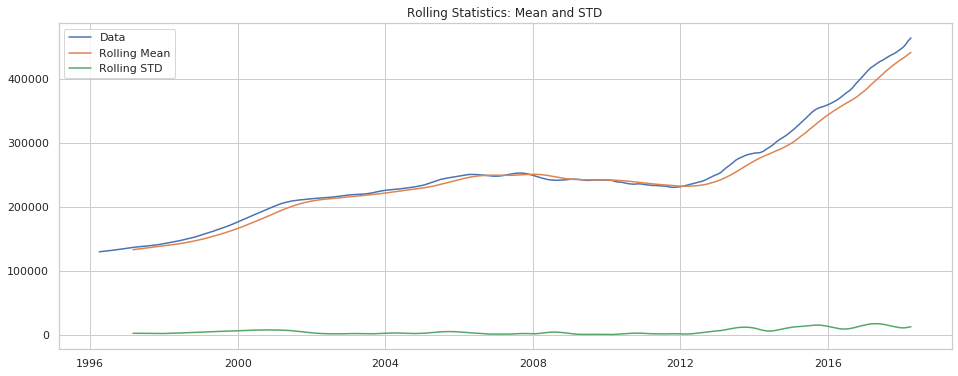

Test Statistic            0.457574
p-Value                   0.983525
Used Lags                13.000000
Observations            251.000000
Critical Value (1%)      -3.456674
Critical Value (5%)      -2.873125
Critical Value (10%)     -2.572944
dtype: float64


ADF Test for Denver city - Denver, CO 80224 

------------------------------------------------------------------------------------------------------------------------


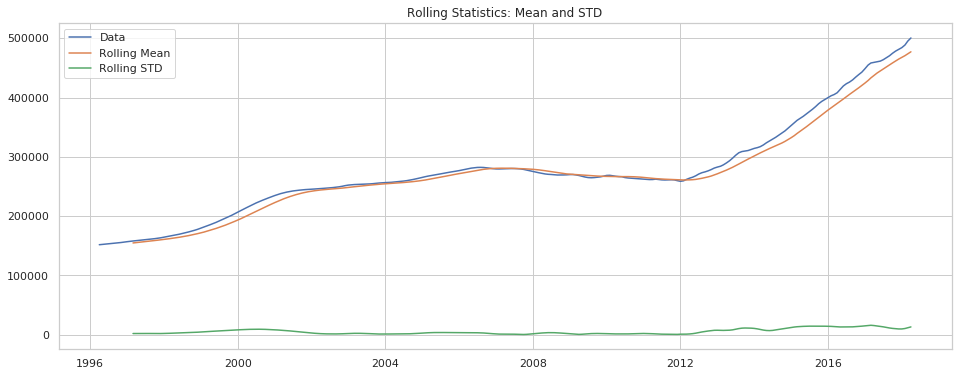

Test Statistic           -0.039656
p-Value                   0.955127
Used Lags                14.000000
Observations            250.000000
Critical Value (1%)      -3.456781
Critical Value (5%)      -2.873172
Critical Value (10%)     -2.572969
dtype: float64


ADF Test for Arvada city - Denver, CO 80002 

------------------------------------------------------------------------------------------------------------------------


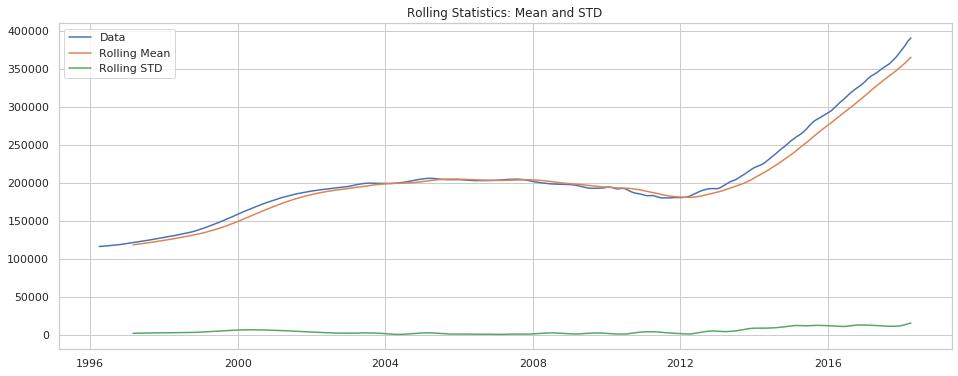

Test Statistic            0.340060
p-Value                   0.979110
Used Lags                 8.000000
Observations            256.000000
Critical Value (1%)      -3.456155
Critical Value (5%)      -2.872897
Critical Value (10%)     -2.572822
dtype: float64


ADF Test for Centennial city - Denver, CO 80121 

------------------------------------------------------------------------------------------------------------------------


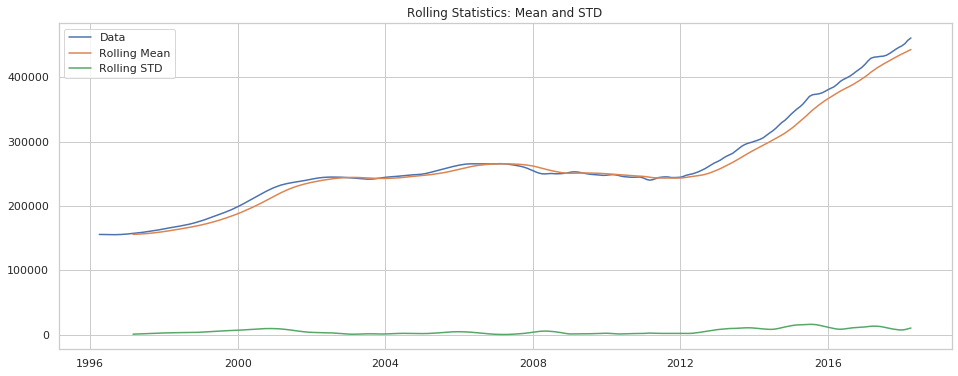

Test Statistic           -0.163607
p-Value                   0.942723
Used Lags                15.000000
Observations            249.000000
Critical Value (1%)      -3.456888
Critical Value (5%)      -2.873219
Critical Value (10%)     -2.572994
dtype: float64




In [19]:
# ADF test for each contender ZIP Code
for i, z in enumerate(zipcodes):
    
    sc = df_ts[df_ts.ZIP == z]['value']
    sc = pd.Series(sc)
    
    print('ADF Test for {} \n'.format(location_dict.get(z)))
    print('-'*120)
    zip_output = adf_stationarity_test(sc, w=12)
    print(zip_output)
    print('\n')

All of the contender ZIP Codes have rolling means with a recent upward trend. There is some variability in the shape of the flat segment occurring between 2004 and 2012. The rolling standard deviations are generally flat across this scale. The ADF test results show p-values higher than all critical values. This means that we fail to reject the null hypothesis, regardless of the confidence level. All ZIP Code time series are non-stationary.

Let's attempt to remove trends in the data using differencing and the partial autocorrelation function. Differencing removes changes in the level of a time series and stabilizes the mean. This helps to eliminate or reduce trends and seasonality. Differencing is performed by subtracting a previous observation (which is adjusted to suit the specific trend structure) from the current observation.

The autocorrelation function (ACF) provides a plot of the correlation of time series observations with values of the same series at previous times by lag. The lag values are on the x-axis and the correlation values are on the y-axis, between -1 and 1. The partial autocorrelation function (PACF) provides a plot of the correlation after removing the effect of any correlations at shorter, intervening lags.

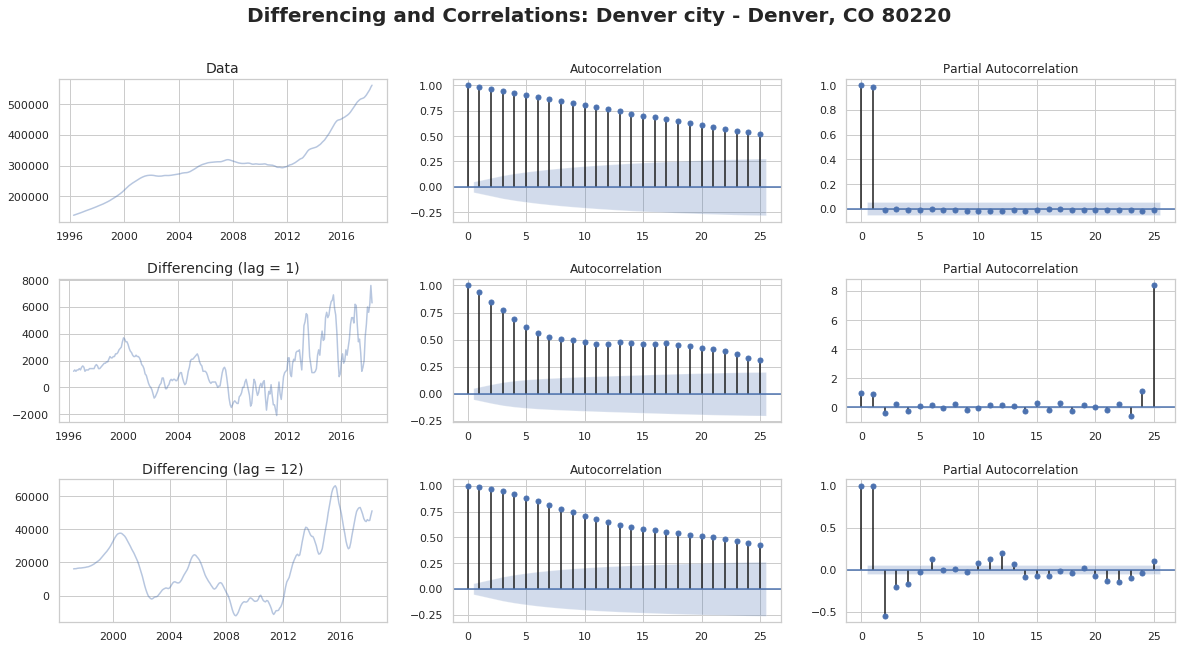

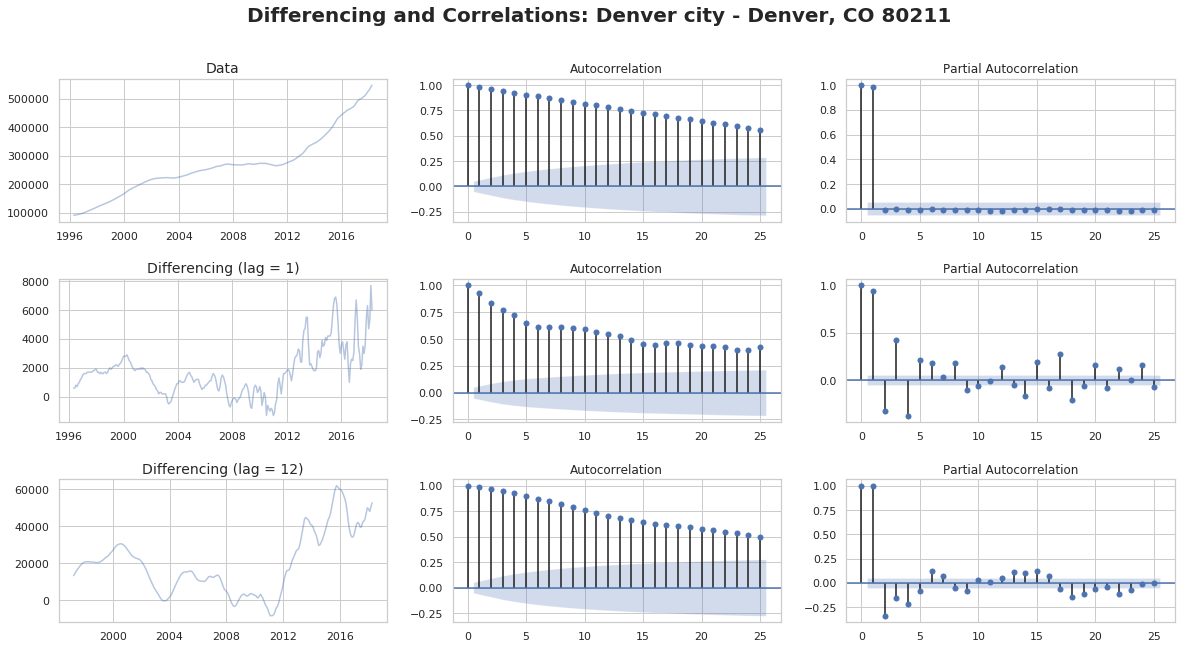

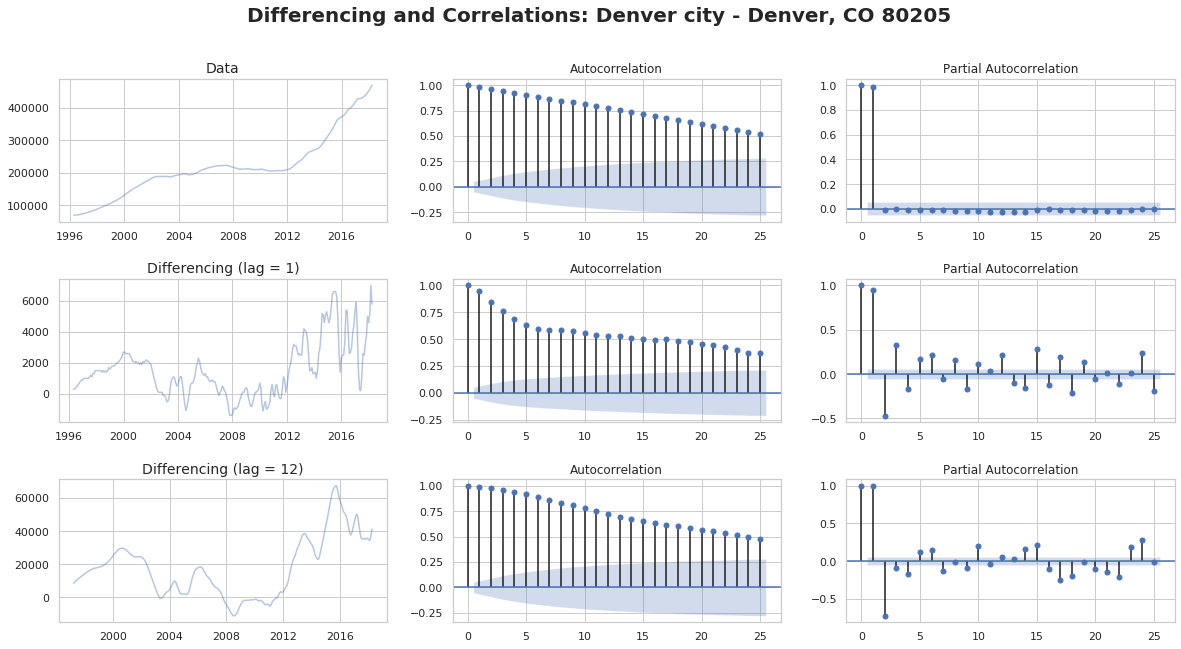

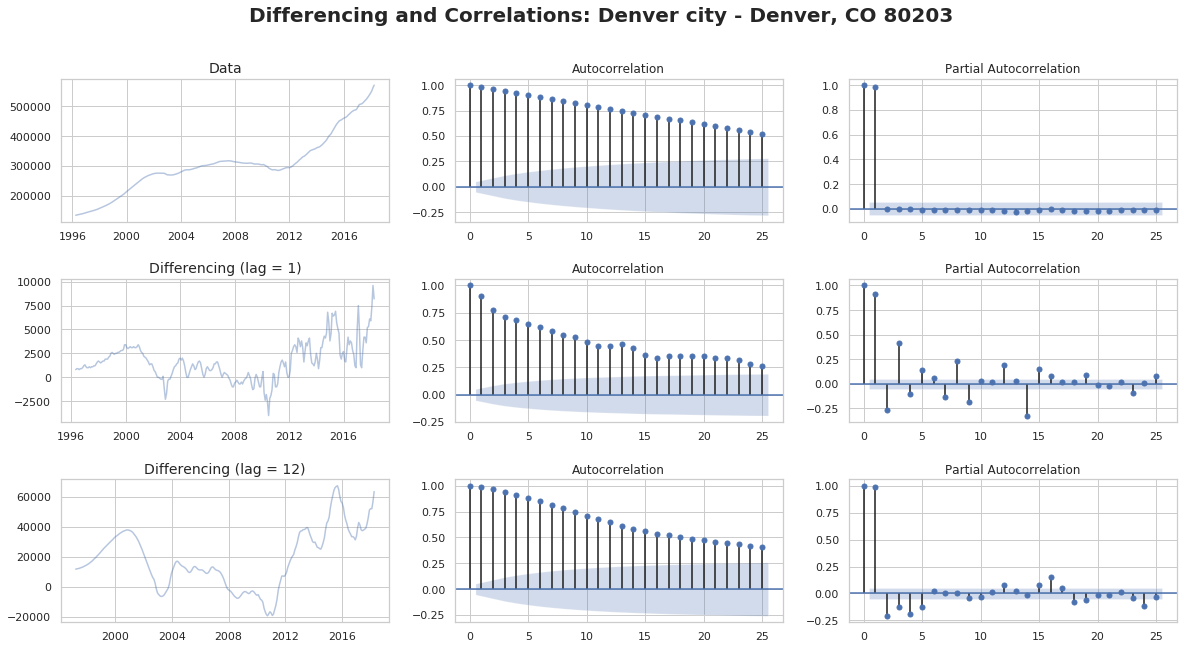

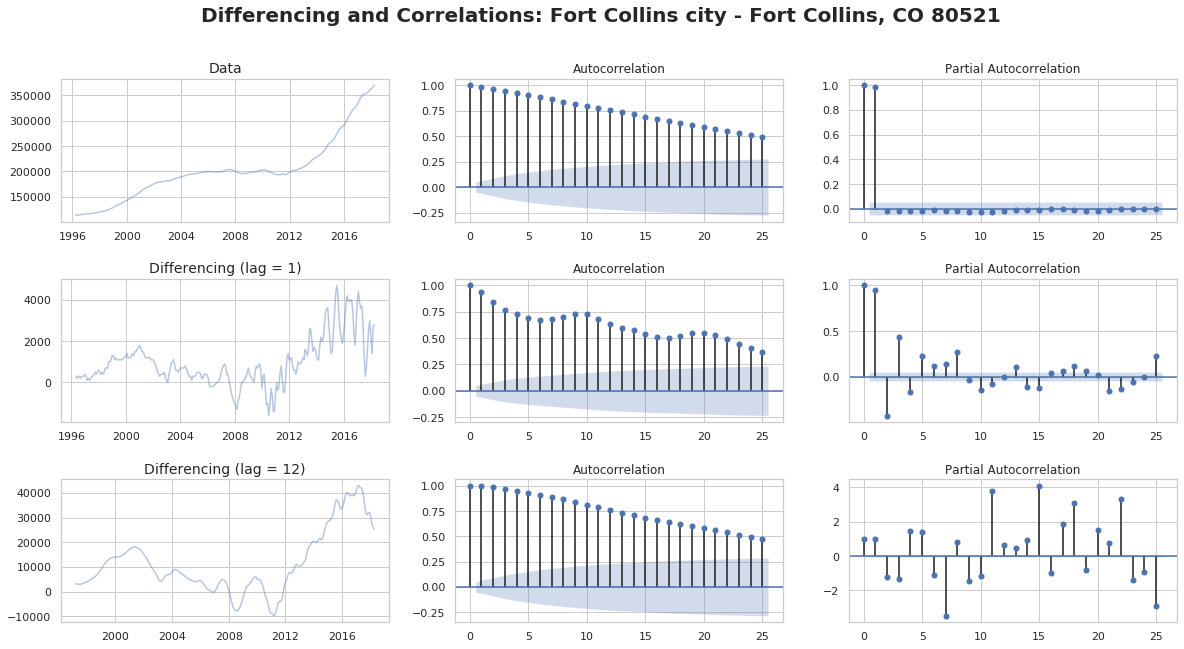

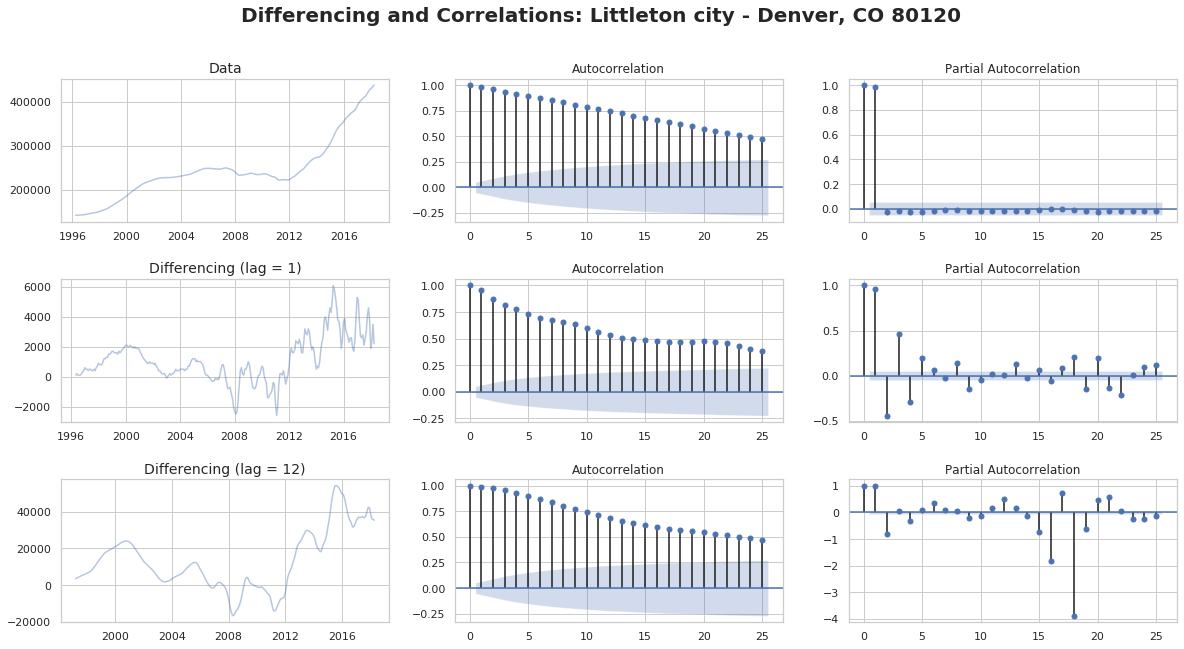

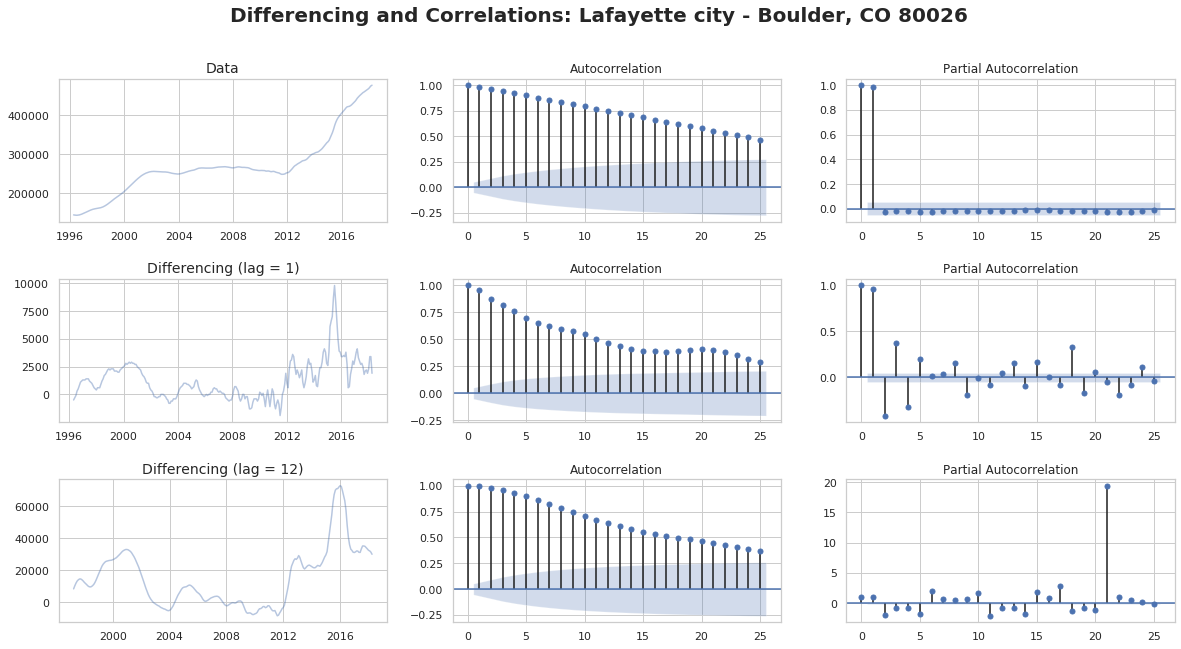

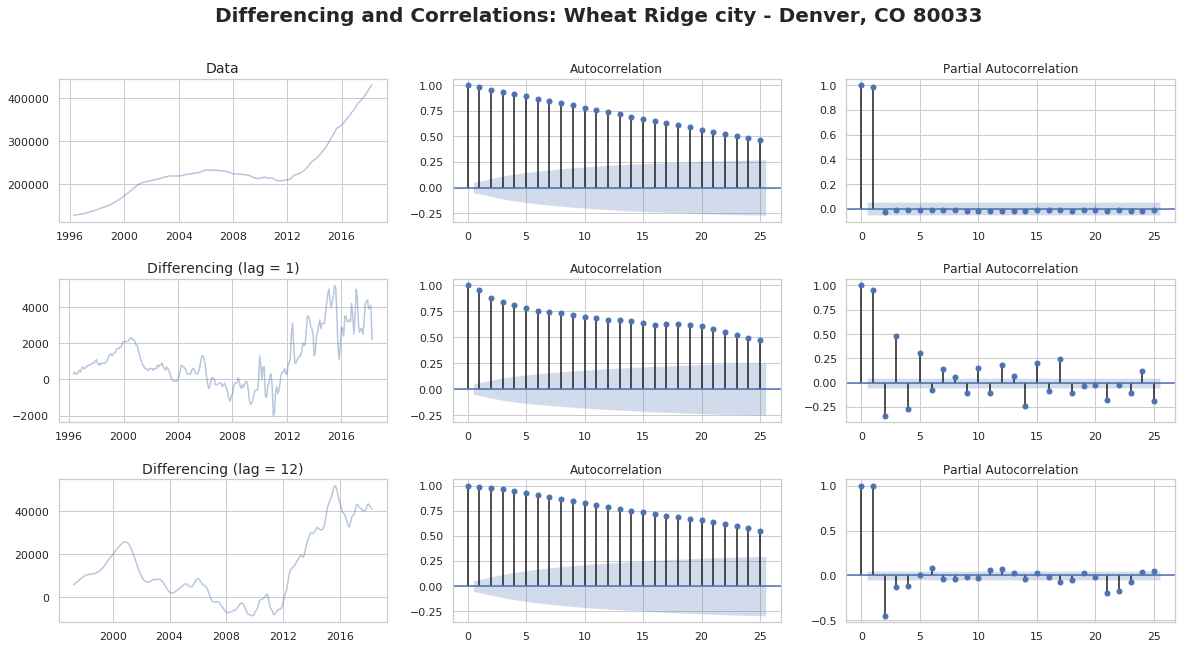

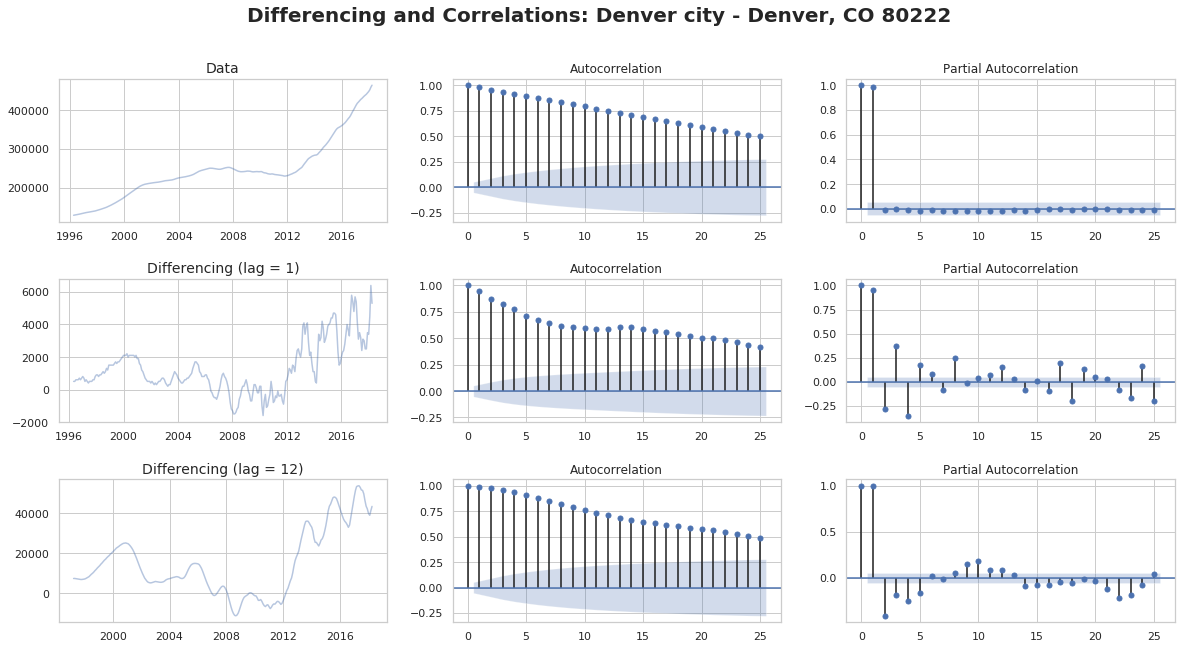

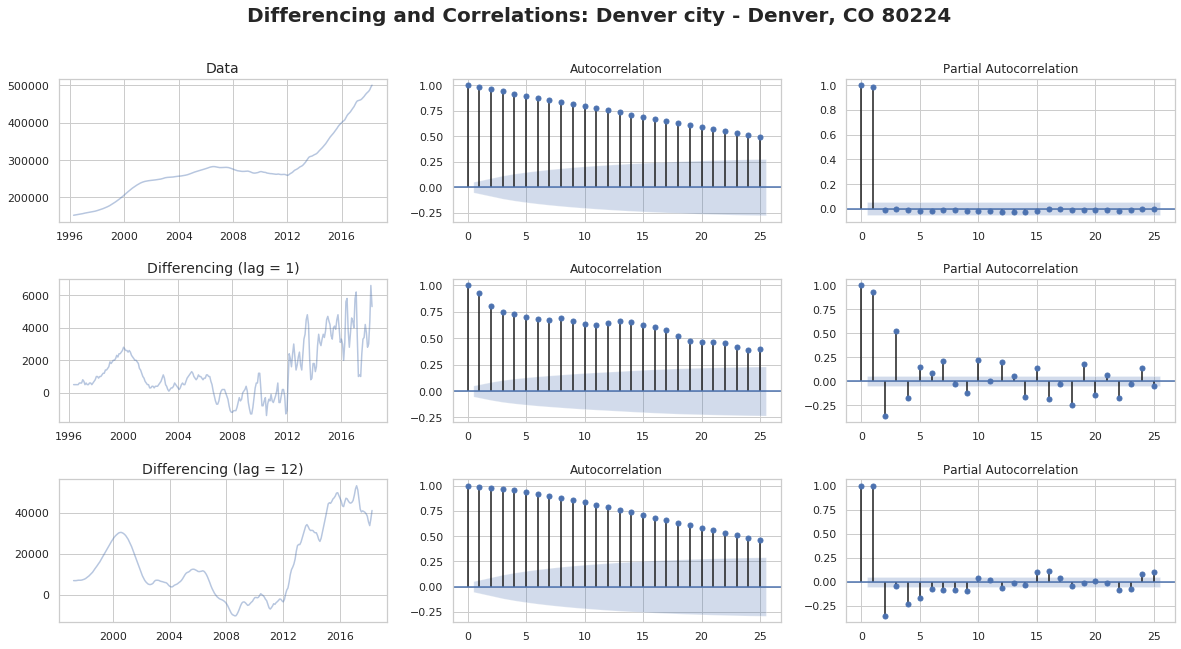

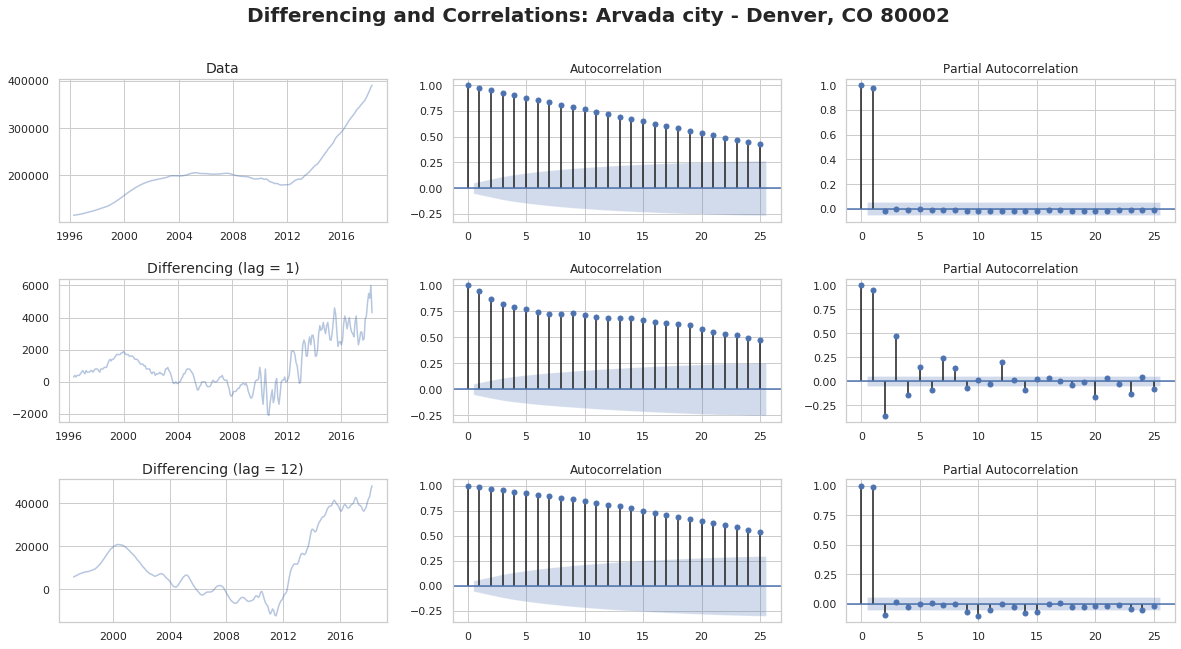

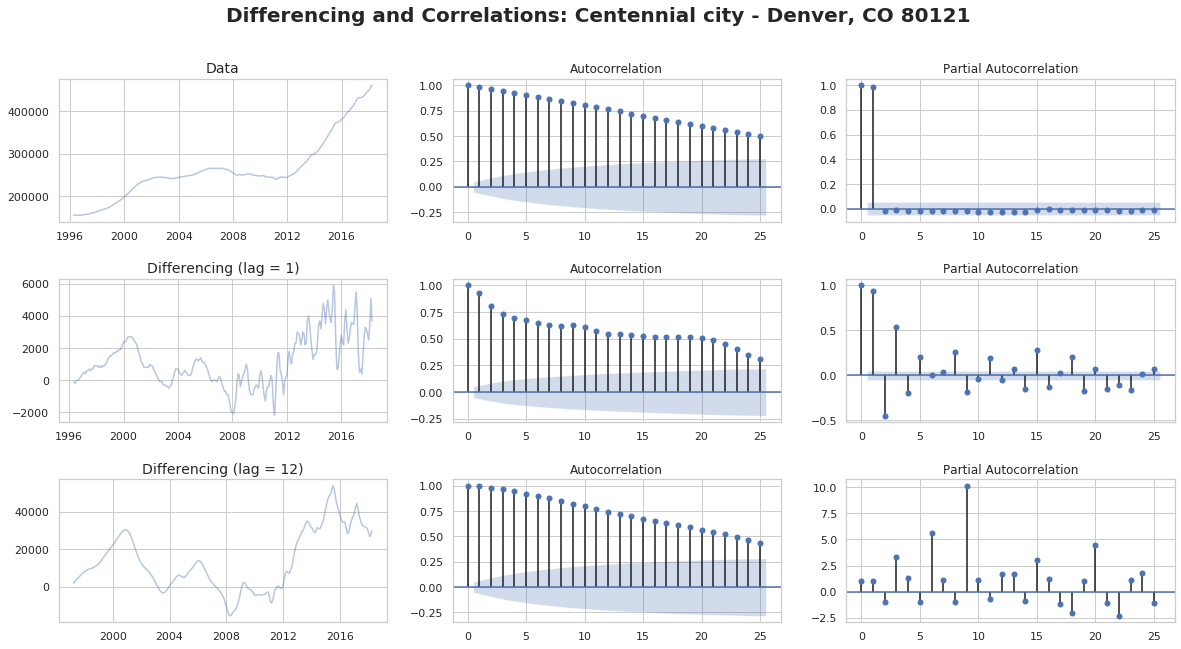

In [20]:
# function for differencing and correlations
plt.rcParams.update({'figure.figsize':(20, 10)})

for z in zipcodes:
    
    z_ts = df_ts[df_ts.ZIP == z]
    
    # data
    fig, axes = plt.subplots(3, 3)
    
    axes[0, 0].plot(z_ts.value, alpha=0.4)
    axes[0, 0].set_title('Data', fontsize=14)
    plot_acf(z_ts.value, ax=axes[0, 1], alpha=0.4)
    plot_pacf(z_ts.value, ax=axes[0, 2], alpha=0.4)
    
    # differencing with lag = 1
    axes[1, 0].plot(z_ts.value.diff(), alpha=0.4)
    axes[1, 0].set_title('Differencing (lag = 1)', fontsize=14)
    plot_acf(z_ts.value.diff().dropna(), ax=axes[1, 1], alpha=0.4)
    plot_pacf(z_ts.value.diff().dropna(), ax=axes[1, 2], alpha=0.4)
    
    # differencing with lag = 12
    axes[2, 0].plot(z_ts.value.diff(periods=12), alpha=0.4)
    axes[2, 0].set_title('Differencing (lag = 12)', fontsize=14)
    plot_acf(z_ts.value.diff(periods=12).dropna(), ax=axes[2, 1], alpha=0.4)
    plot_pacf(z_ts.value.diff(periods=12).dropna(), ax=axes[2, 2], alpha=0.4)
    
    # figure    
    fig.suptitle('Differencing and Correlations: {}'.format(location_dict.get(z)), fontsize=20, fontweight='bold')
    plt.subplots_adjust(hspace=0.4)
    plt.show();

For each of the contending ZIP Codes, the differencing plot with lag = 1 (comparing against the data) introduces noise into the line plot; slightly decreases the correlations across lags in the Autocorrelation plot; and, introduces many small correlation coefficients for lags greater than 1 in the Partial Autocorrelation plot.

The differencing plot with lag = 12 (comparing against lag = 1) smooths out the differencing noise in the line plot; makes minimal changes to the Autocorrelation plot; and, generally dampens the small correlation coefficients for lags greater than 1 in the Partial Autocorrelation plot.

Overall, results are underwhelming. There is no detrending in the line plot; no steep decline in correlations in the ACFs; and, no lag stability in the PACFs.

We will assess our options, given the presence of trends, in the modeling phase by looking at the effects of different models on each ZIP Code.

[[table of contents]](#Table-of-Contents)

## 6. Modeling

In the data modeling phase of CRISP-DM we iterate through the process of building models. A final model is the one best tuned to answer an organization's data mining question.

### Activities:

- Tune models fit to training sets
- Predict values for testing sets
- Compare best model performance
- Select the top 5 models

The <strong>S</strong>easonal <strong>A</strong>uto-<strong>R</strong>egressive <strong>I</strong>ntegrated <strong>M</strong>oving <strong>A</strong>verage (SARIMA) model is an approach for modeling time series data that may contain trend and seasonal components. Configuring a SARIMA model requires selecting hyperparameters for both trend and seasonal elements of the time series.

There are three trend elements:
- **p**: Trend autoregression order.
- **d**: Trend difference order.
- **q**: Trend moving average order.

And there are four seasonal elements:
- **P**: Seasonal autoregressive order.
- **D**: Seasonal difference order.
- **Q**: Seasonal moving average order.
- **m**: The number of time steps for a single seasonal period.

Together, the notation for an SARIMA model is specified as:
- SARIMA(p,d,q)(P,D,Q)m

A useful approach to configuring the model that makes use of modern hardware is to grid search for hyperparameter values to discover which configuration is best. During the modeling phase we will conduct a stepwise search of SARIMA hyperparameter to reduce the model training time from hours to minutes. The `auto_arima` function in the `pyramid` package employes a grid search strategy where a group of models that have hyperparameter values that are close to one another are trained. The model with the best performance metric (smallest AIC score) becomes the contending best model. The hyperparameters values selected for the group of models then shifts around the contender. The process stops once model performance is found inable to improve or the provided search boundaries have been exhausted. 

This process will be applied to each ZIP code where 10% of values have been set aside for testing. 

In [21]:
# fit SARIMA model to each ZIP code
model = {}
for i in df_ts.ZIP.unique():
  n_test = round(df_ts[df_ts.ZIP == i].shape[0] * 0.1)
  model[i] = pm.auto_arima(df_ts[df_ts.ZIP == i][:-n_test]['value'], start_p=1, d=1, start_q=1, max_p=3, max_q=3, m=12, 
                            start_P=0, D=1, start_Q=0, max_P=3, max_Q=3, seasonal=True, trace=True, 
                             error_action='ignore', suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 1, 0, 12) (constant=True); AIC=3967.174, BIC=3980.856, Time=1.361 seconds
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 12) (constant=True); AIC=3998.237, BIC=4005.078, Time=0.041 seconds
Fit ARIMA: (1, 1, 0)x(1, 1, 0, 12) (constant=True); AIC=3984.410, BIC=3998.092, Time=2.056 seconds
Fit ARIMA: (0, 1, 1)x(0, 1, 1, 12) (constant=True); AIC=3989.778, BIC=4003.460, Time=0.616 seconds
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 12) (constant=False); AIC=3998.032, BIC=4001.453, Time=0.048 seconds
Fit ARIMA: (1, 1, 1)x(1, 1, 0, 12) (constant=True); AIC=3973.915, BIC=3991.018, Time=2.589 seconds
Fit ARIMA: (1, 1, 1)x(0, 1, 1, 12) (constant=True); AIC=3975.691, BIC=3992.793, Time=4.526 seconds
Fit ARIMA: (1, 1, 1)x(1, 1, 1, 12) (constant=True); AIC=3972.913, BIC=3993.436, Time=4.694 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit A

View the best model hyperparameters for each ZIP Code.

In [22]:
# view the model parameters for each ZIP code
for i in model.keys():
  print('ZIP', i, ':', model[i].get_params())

ZIP 80220 : {'maxiter': 50, 'method': 'lbfgs', 'order': (1, 1, 1), 'out_of_sample_size': 0, 'scoring': 'mse', 'scoring_args': None, 'seasonal_order': (0, 1, 0, 12), 'start_params': None, 'suppress_warnings': True, 'trend': None, 'with_intercept': True}
ZIP 80026 : {'maxiter': 50, 'method': 'lbfgs', 'order': (1, 1, 1), 'out_of_sample_size': 0, 'scoring': 'mse', 'scoring_args': None, 'seasonal_order': (2, 1, 1, 12), 'start_params': None, 'suppress_warnings': True, 'trend': None, 'with_intercept': True}
ZIP 80521 : {'maxiter': 50, 'method': 'lbfgs', 'order': (1, 1, 1), 'out_of_sample_size': 0, 'scoring': 'mse', 'scoring_args': None, 'seasonal_order': (0, 1, 0, 12), 'start_params': None, 'suppress_warnings': True, 'trend': None, 'with_intercept': True}
ZIP 80033 : {'maxiter': 50, 'method': 'lbfgs', 'order': (1, 1, 1), 'out_of_sample_size': 0, 'scoring': 'mse', 'scoring_args': None, 'seasonal_order': (0, 1, 0, 12), 'start_params': None, 'suppress_warnings': True, 'trend': None, 'with_interc

The output above provides the model parameters for each of the 12 considered ZIP codes. For non-seasonal orders, all models are in agreement on the parameter values:`p` = 1, `d` = 1, and `q` = 1. For the seasonal components with monthly seasonality prescribed by the dataset, `m` = 12, the agreement between models disappears: for arguments in the form of `(P, D, Q)`, (0, 1, 0) is in 8 models; (1, 1, 0) is in 2 models; (0, 1, 1) is in 1 model; and, (2, 1, 0) is in 1 model. 

The next task is to inspect predictions made by the models to visually assess the fit quality. We do this by looking at predictions of both the training and testing sets.

In [0]:
# model predictions for training and testing sets
train_preds = {}
test_preds = {}
test_cint = {}
for i in model.keys():
  n_test = round(df_ts[df_ts.ZIP == i].shape[0] * 0.1)
  train_preds[i] = model[i].predict_in_sample()
  test_preds[i], test_cint[i] = model[i].predict(n_test, return_conf_int=True) 

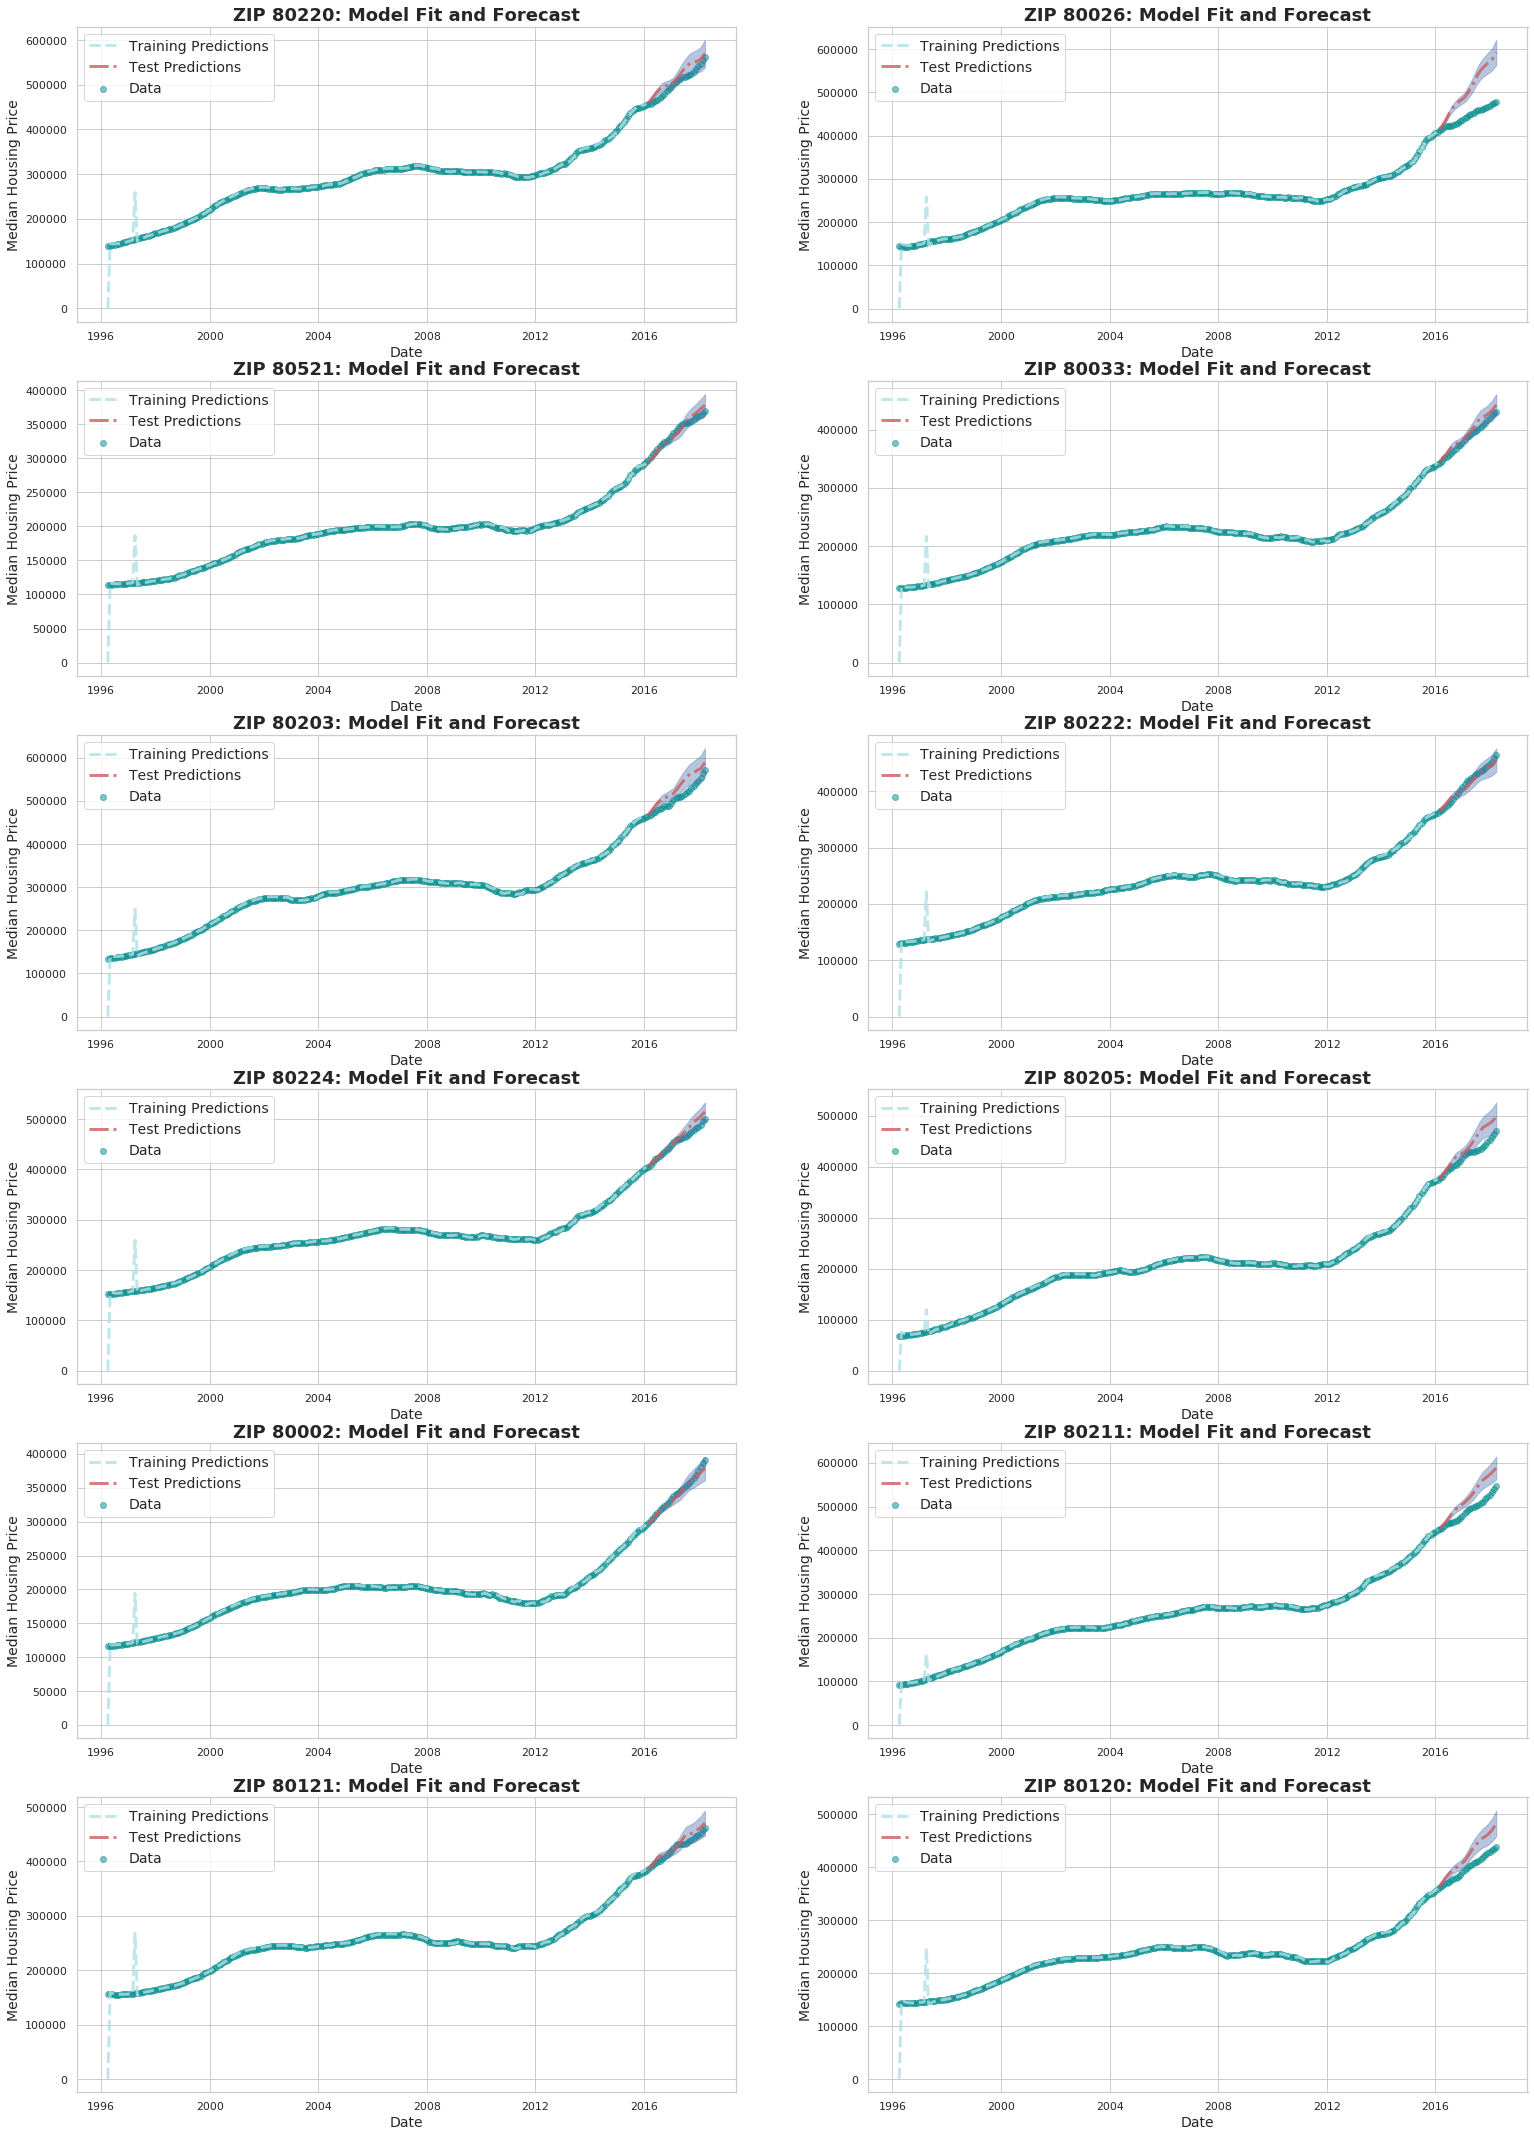

In [24]:
# plot the fit between data and model predictions
fig, ax = plt.subplots(6, 2, figsize=(26, 38))
zc = list(model.keys())
for i in range(len(model.keys())):
  ax[i//2, i%2].scatter(df_ts[df_ts.ZIP == zc[i]].index, df_ts[df_ts.ZIP == zc[i]].value, color='darkcyan', alpha=0.5, label='Data')
  ax[i//2, i%2].plot(df_ts[df_ts.ZIP == zc[i]][:train_preds[zc[i]].shape[0]].index, train_preds[zc[i]], color='powderblue', alpha=0.8, linewidth=3, linestyle='--', label='Training Predictions')
  ax[i//2, i%2].plot(df_ts[df_ts.ZIP == zc[i]][-test_preds[zc[i]].shape[0]:].index, test_preds[zc[i]], alpha=0.8, color='indianred', linewidth=3, linestyle='-.', label='Test Predictions')
  ax[i//2, i%2].fill_between(df_ts[df_ts.ZIP == zc[i]][-test_preds[zc[i]].shape[0]:].index, test_cint[zc[i]][:, 0], test_cint[zc[i]][:, 1], alpha=0.4, color='b')
  ax[i//2, i%2].set_title('ZIP ' + zc[i] + ': Model Fit and Forecast', fontsize=18, fontweight='bold')
  ax[i//2, i%2].set_ylabel('Median Housing Price', fontsize=14)
  ax[i//2, i%2].set_xlabel('Date', fontsize=14)
  ax[i//2, i%2].legend(prop={'size':14});

The fit between the training set data and its predictions is exceptonally good for all ZIP Codes. There is an issue with a spike in predictions around 1997, but otherwise the model follows the data closely. 

The fit between the testing set data and its predictions has room for improvement. In all cases, the model overestimates the median housing price. There is good news, however, in that the confidence interval contains the data for most of the ZIP Codes. For 80026, 80120, 80211, and 80205, the lower boundary of the confidence intervals is higher than the data values. ZIP Code 80026 is an especially eggregious case of test predictions deviating from the data.

The final task in the modeling phase is to select the top 5 ZIP codes based on predictive ability. The rationale behind this action is that the company's returns are maximized if it invests in ZIP Codes with models most closely matching recent housing sales. The metric used to compare models is the root mean square error. This metric provides an idea of how far model predictions are from the observations.


In [25]:
# model comparison
df_zm = pd.DataFrame(columns=['ZIP', 'trainRMSE', 'testRMSE', 'aic', 'aicc', 'bic', 'hqic'], index=range(0, 12))
for i in range(len(zc)):
  df_zm.ZIP[i] = zc[i]
  df_zm.trainRMSE[i] = mean_squared_error(df_ts[df_ts.ZIP == zc[i]][:train_preds[zc[i]].shape[0]].value, train_preds[zc[i]])
  df_zm.testRMSE[i] = mean_squared_error(df_ts[df_ts.ZIP == zc[i]][-test_preds[zc[i]].shape[0]:].value, test_preds[zc[i]])
  df_zm.aic[i] = model[zc[i]].aic()
  df_zm.aicc[i] = model[zc[i]].aicc()
  df_zm.bic[i] = model[zc[i]].bic()
  df_zm.hqic[i] = model[zc[i]].hqic()
df_zm.sort_values(by='testRMSE', ascending=True)[:5]

ZIP    trainRMSE     testRMSE      aic     aicc      bic     hqic
8   80002  7.85689e+07  1.92618e+07  3692.51  3692.68  3706.19  3698.03
2   80521   7.4837e+07  2.68617e+07   3667.1  3667.28  3680.79  3672.63
5   80222  1.00982e+08  3.31962e+07  3795.44   3795.7  3812.54  3802.34
10  80121  1.53825e+08  6.08904e+07  3884.41  3884.59   3898.1  3889.94
3   80033  9.78504e+07  7.71766e+07  3775.76  3775.93  3789.44  3781.28

The top 5 ZIP codes are 80002, 80521, 80222, 80121, and 80033.

The next framework phase will validate the models for these top 5 ZIP codes and build confidence in their conclusions.


[[table of contents]](#Table-of-Contents:)

## 7. Validation
 
In the validation phase of CRISP-DM we apply business success criteria to the models that were built according to data mining criteria. This step ensures that an organization can make use of the results obtained. It can also lead to reconsidering business issue understanding and further iterations of the CRISP-DM process.

### Activities:
- Review model summaries
- Compare with seasonal decomposition
- Contrast with plot diagnostics
- Validate coefficients

The first step in this phase is to validate the context in which the models draw their conclusions. This is done by looking at statistical tests that are reported.

In [26]:
# model summaries
top_5 = ['80002', '80521', '80222', '80121', '80033']
for i in range(len(top_5)):
  print(location_dict.get(top_5[i])) 
  print(model[top_5[i]].summary().tables[1])
  print(model[top_5[i]].summary().tables[2])
  print('\n')

Arvada city - Denver, CO 80002
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     24.5436     13.941      1.761      0.078      -2.781      51.868
ar.L1          0.8860      0.051     17.429      0.000       0.786       0.986
ma.L1         -0.8365      0.053    -15.645      0.000      -0.941      -0.732
sigma2      6.427e+05   5.04e+04     12.740      0.000    5.44e+05    7.42e+05
Ljung-Box (Q):                      317.60   Jarque-Bera (JB):                17.85
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.53   Skew:                             0.50
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.95


Fort Collins city - Fort Collins, CO 80521
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------

Characteristics of each model can be determined from the summaries:

- The models for ZIP Codes 80002, 80521, 80121, and 80033 have one non-seasonal autoregressive component and one non-seasonal moving average component. The model for ZIP Codes 80222 adds a seasonal autoregressive component on top of that. The coefficient in each model are found to be statistically significant (p < 0.05). 

- Despite models being trained separately and on different data, in all cases the non-seasonal autoregressive component is positive with a value around 0.7; the non-seasonal moving average component is negative with a value around -0.6; and, the seasonal autoregressive component is negative with a value near -0.03.

- The `Jarque-Bera` test is used to test the null hypothesis that the sample is from the normal distribution. The test probability (p-value) reflects the probability of accepting the null hypothesis. If this p-value is below 0.05 then the null hypothesis is rejected and the sample does not come from a normal distribution. All 5 ZIP Codes have `Prob(JB)` < 0.05, meaning they are not normally distributed. 

- If `skew` is positive, the data distribution has a right tail that is longer than the left tail. If `skew` is negative, the data data distribution has a left tail that is longer. All 5 ZIP Codes have `skew` that is positive. The order of increasing skewness is 80121 (0.20), 80521 (0.42), 80222 (0.43), 80033 (0.45), and 80002 (0.50).

- As a general rule of thumb: if `kurtosis` is less than 3, it is platykurtic with a flat peak and dispersed values with light tails; 
If `kurtosis` is equal to 3, it is mesokurtic with a medium-height peak and moderate width;
If `kurtosis` is greater than 3, it is leptokurtic with a sharp peak and heavy tails.All 5 ZIP Codes have `kurtosis` greater than 3, meaning leptokurtic distributions with a high peak and long tails.

- The `Ljung-Box` test is used to test for the absence of serial autocorrelation, (up to a given lag k). The test determines if errors are independent and identically distributed (iid) or if the autocorrelations for the residuals are non-zero. If the autocorrelations of the residuals are small the model doesn't show a significant lack of fit. The null hypothesis of the `Ljung-Box` test is that the model does not show lack of fit. A significant p-value in this test rejects the null hypothesis that the time series does not show autocorrelation. All 5 ZIP Codes have p-values for `Ljung-Box`, `P(Q)`, of 0, meaning autocorrelation is present.

- The `heteroscedasticity` test  is used to test for the assumption of homoscedasticity where the variance of the residuals is consistent across values of independent variables. The null hypothesis is that the model is homoscedastic. A significant result for the p-value of this test means the variance is not consistent across the model (e.g., cone-shaped) and the data is heteroscedastic. All ZIP codes have p-values for `Heteroscedasticity`, `P(H)`, below 0.05 (i.e., unequal errors). 

The next step is to validate model summaries by looking at the seasonal decomposition of the data to determine if patterns are present that visually match the coefficients.

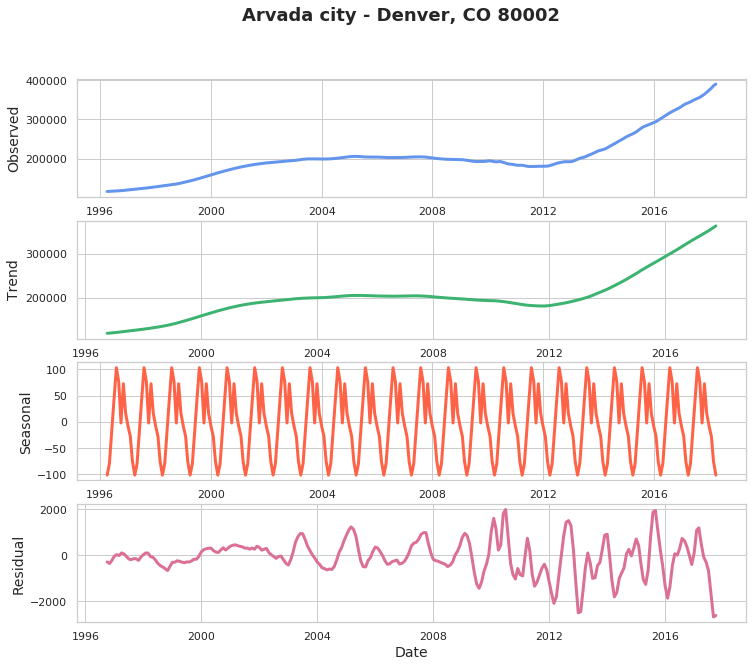

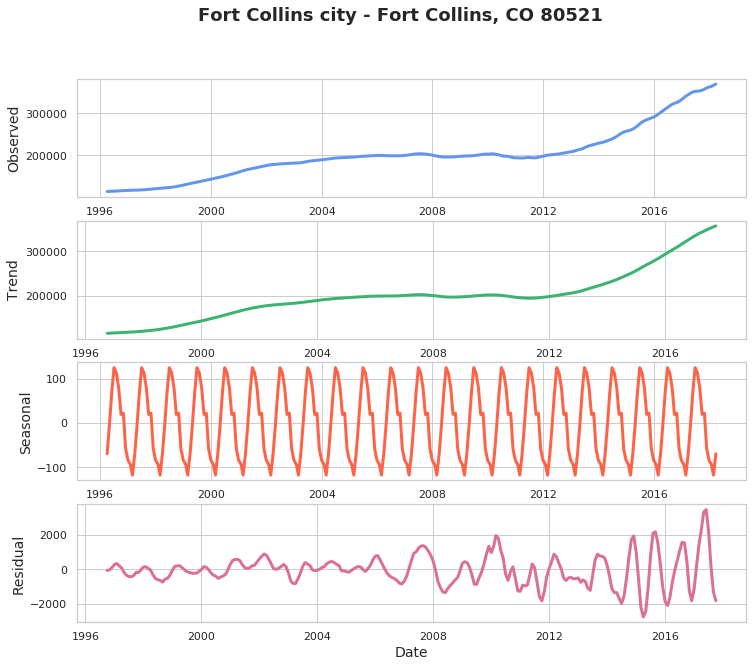

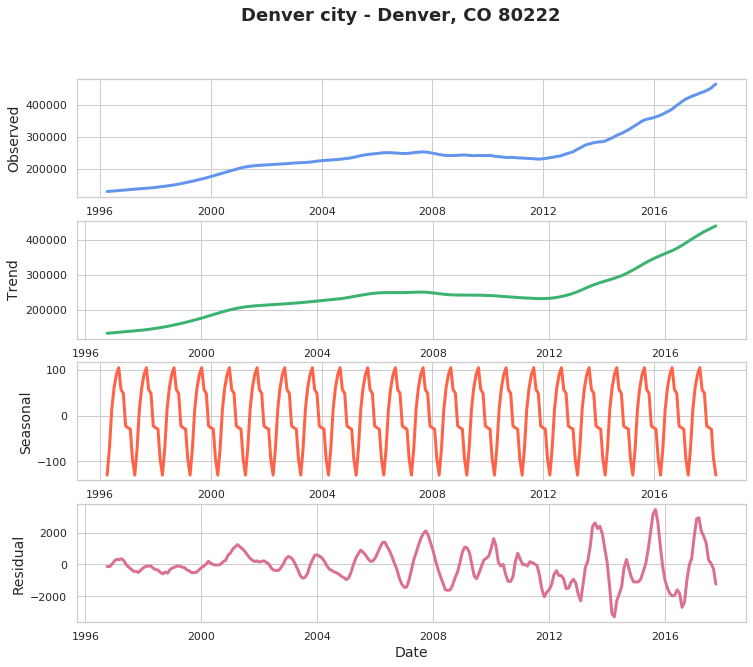

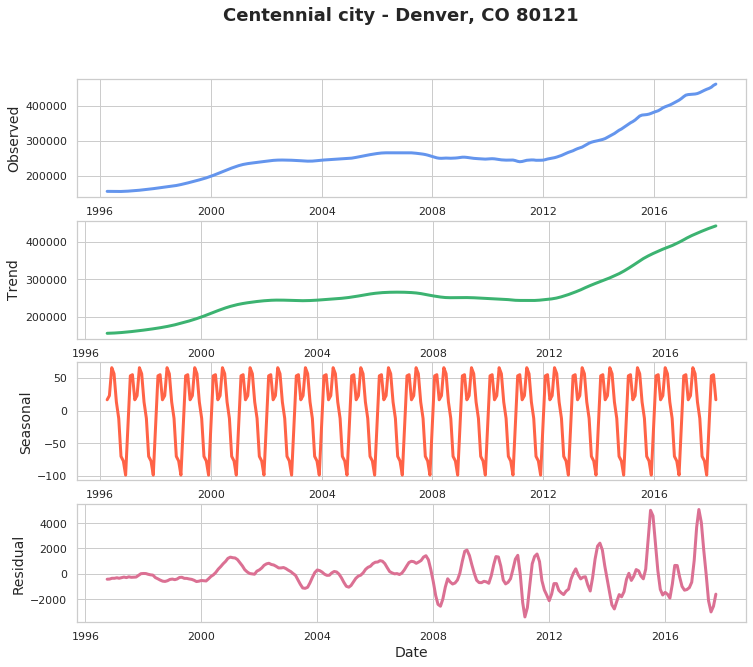

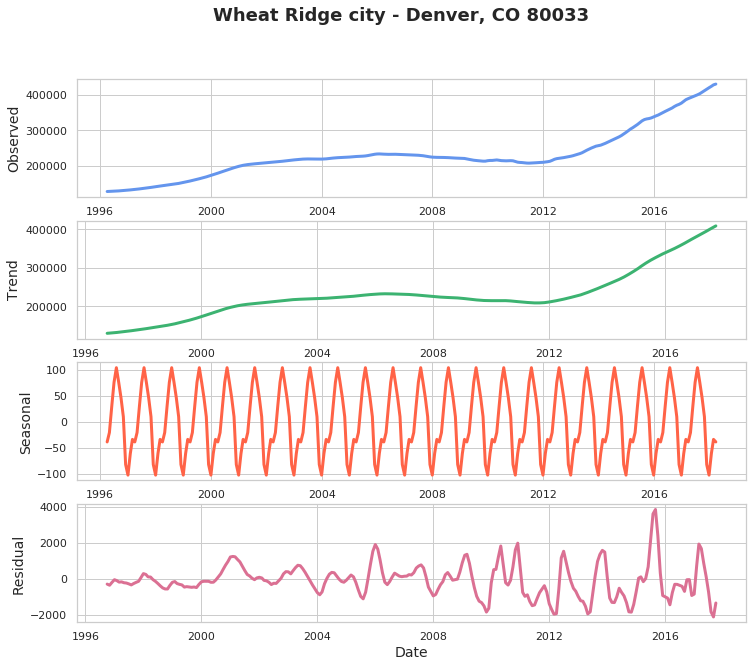

In [27]:
 # seasonal decomposition
 for i in range(len(top_5)): 
  plt.figure(figsize=(12, 10))
  decompose = seasonal_decompose(df_ts[df_ts.ZIP == top_5[i]].value)
  plt.suptitle(location_dict.get(top_5[i]), fontsize=18, fontweight='bold')
  plt.subplot(411)
  plt.plot(decompose.observed, label='Observed', color='cornflowerblue', linewidth=3)
  plt.ylabel('Observed', fontsize=14)
  plt.subplot(412)
  plt.plot(decompose.trend, label='Trend', color='mediumseagreen', linewidth=3)
  plt.ylabel('Trend', fontsize=14)
  plt.subplot(413)
  plt.plot(decompose.seasonal, label='Seasonal', color='tomato', linewidth=3)
  plt.ylabel('Seasonal', fontsize=14)
  plt.subplot(414)
  plt.plot(decompose.resid, label='Residual', color='palevioletred', linewidth=3)
  plt.ylabel('Residual', fontsize=14)
  plt.xlabel('Date', fontsize=14)


Observations from the seasonal decompositions:

- The trend plots in the figures above show a long-term increase in the median housing price for all ZIP codes. This agrees with the large positive non-seasonal autoregressive coefficient. 

- Looking at the observed plots, the value of the last data points in 2018 is roughly two to three times the value of the first data points in 1996. In the context of the large time span of this dataset, the negative non-seasonal moving average coefficient makes sense. 

- The seasonal plots clearly show repeating patterns that occur approximately one time per year. The presence of a seasonal autoregressive coefficient to temper median housing price values is reasonable.

- The variation in the residual plots grows as time passes. This is a likely contributor to the differences in model coefficients and their values.

The final step in this phase is to validate the model conclusions by looking for alignment between plot diagnostics and statistical tests.


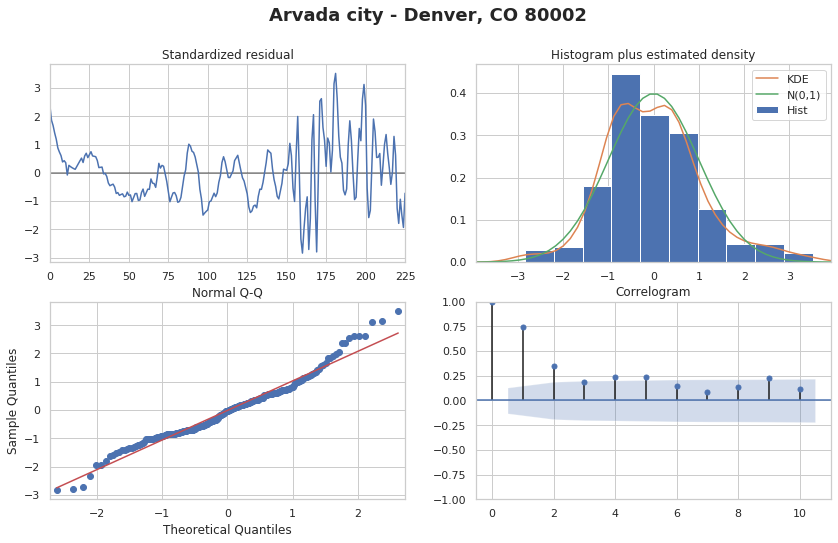

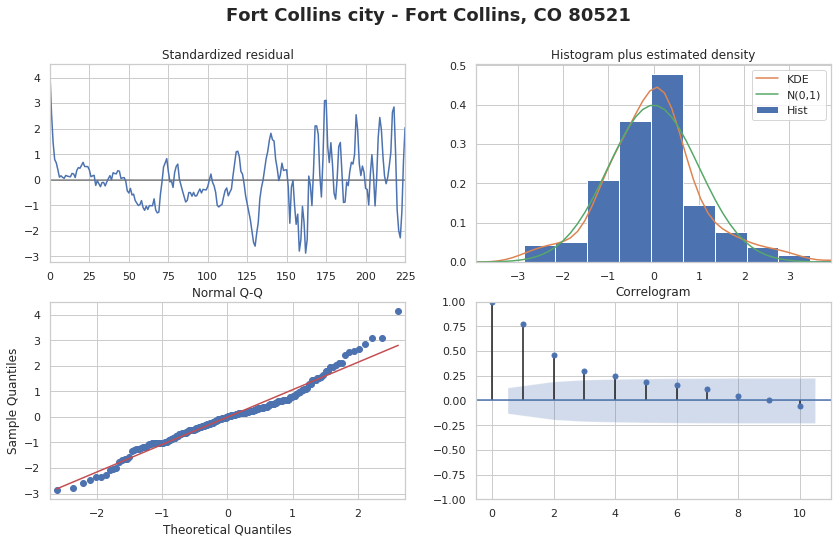

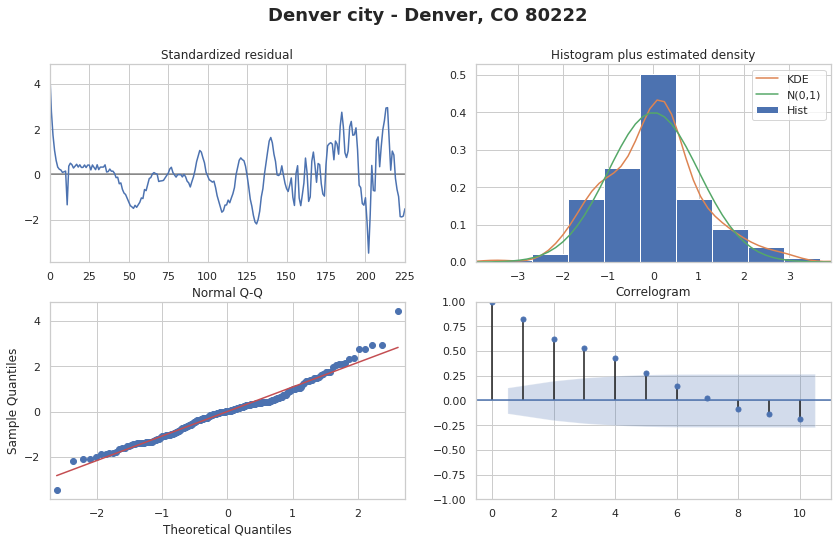

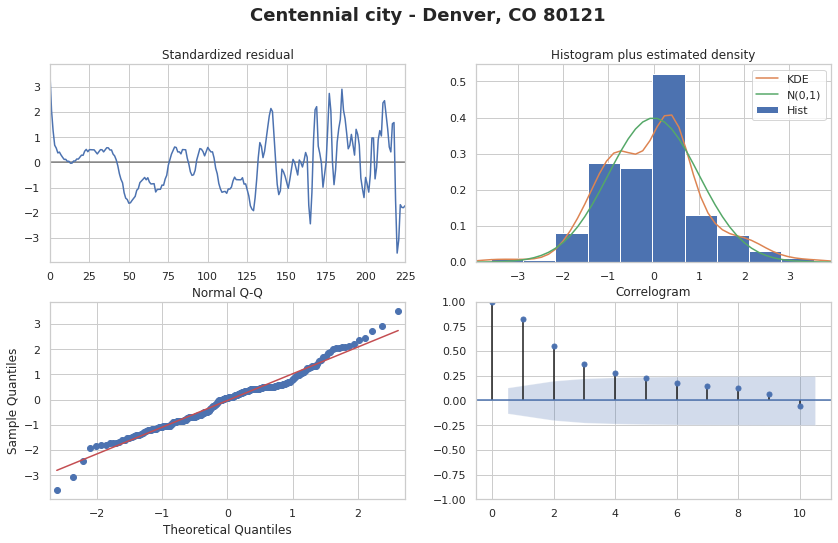

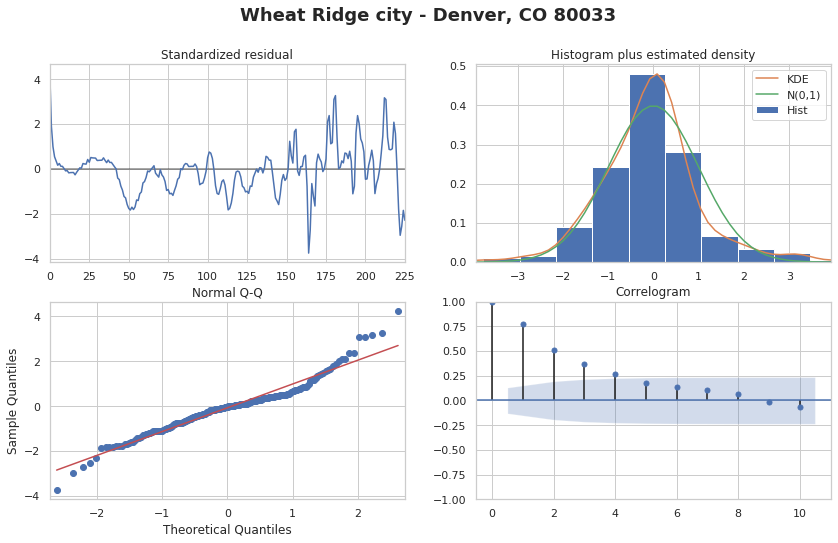

In [28]:
# plot diagnostics
for i in range(len(top_5)):
  ax = plt.figure(figsize=(14, 8))
  model[top_5[i]].plot_diagnostics(fig=ax)
  ax.suptitle(location_dict.get(top_5[i]), fontsize=18, fontweight='bold')

Observations from the diagnostic plots for standardized residuals:

- The standardized residuals over time plots show fluctuations about the mean that are increasing over time. This effect confirms the heteroscedasticity conclusion for all five ZIP codes.

- The hisotgram (with estimated density of standardized residuals and normal (0,1) density reference) shows how close each ZIP code is to normality. The right tails are larger for all ZIP codes, confirming the positive skew. Each histogram has a high peak and long tails, confirming the kurtosis result.

- The normal Q-Q plot (with normal reference line) shows large deviation at the tails and slight deviation in the middle. This gap is large enough to reasonably conclude that the distributions are not normal. This confirms the Jacque-Bera test conclusion.

- The correlogram plot shows the autocorrelation of residual errors. The high values of the first lags indicate there is some pattern in residual errors that is not explained by the model. This confirms the autocorrelation found by the Ljung-Box test.

The final phase is to put everything together and showcase the benefits of this investigation.


[[table of contents]](#Table-of-Contents:)

## 8. Visualization

During the visualization phase new insights are used to consider improvements within the organization. The focus is on what actions to take after ingesting model results.  

### Activities:
- De-trend
- control for seasonality
- apply the auto_arima model
- examine model diagnostics
- fit the optimized parameters model to training data
- forecast housing prices based on final model

In [29]:
# fit SARIMA model to each ZIP code
final_model = {}
for i in top_5:
  final_model[i] = pm.auto_arima(df_ts[df_ts.ZIP == i]['value'], start_p=1, d=1, start_q=1, max_p=3, max_q=3, m=12, 
                            start_P=0, D=1, start_Q=0, max_P=3, max_Q=3, seasonal=True, trace=True, 
                             error_action='ignore', suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 1, 0, 12) (constant=True); AIC=4142.027, BIC=4156.145, Time=1.684 seconds
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 12) (constant=True); AIC=4161.146, BIC=4168.204, Time=0.046 seconds
Fit ARIMA: (1, 1, 0)x(1, 1, 0, 12) (constant=True); AIC=4149.094, BIC=4163.212, Time=1.870 seconds
Fit ARIMA: (0, 1, 1)x(0, 1, 1, 12) (constant=True); AIC=4150.158, BIC=4164.276, Time=1.694 seconds
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 12) (constant=False); AIC=4167.280, BIC=4170.809, Time=0.053 seconds
Fit ARIMA: (1, 1, 1)x(1, 1, 0, 12) (constant=True); AIC=4145.084, BIC=4162.731, Time=3.995 seconds
Fit ARIMA: (1, 1, 1)x(0, 1, 1, 12) (constant=True); AIC=4145.073, BIC=4162.720, Time=4.997 seconds
Fit ARIMA: (1, 1, 1)x(1, 1, 1, 12) (constant=True); AIC=4145.076, BIC=4166.252, Time=5.507 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)
Fit A

View the final model hyperparameters.

In [30]:
# view the model parameters for each ZIP code
for i in final_model.keys():
  print('ZIP', i, ':', final_model[i].get_params())

ZIP 80002 : {'maxiter': 50, 'method': 'lbfgs', 'order': (1, 1, 2), 'out_of_sample_size': 0, 'scoring': 'mse', 'scoring_args': None, 'seasonal_order': (0, 1, 0, 12), 'start_params': None, 'suppress_warnings': True, 'trend': None, 'with_intercept': True}
ZIP 80521 : {'maxiter': 50, 'method': 'lbfgs', 'order': (1, 1, 1), 'out_of_sample_size': 0, 'scoring': 'mse', 'scoring_args': None, 'seasonal_order': (1, 1, 0, 12), 'start_params': None, 'suppress_warnings': True, 'trend': None, 'with_intercept': True}
ZIP 80222 : {'maxiter': 50, 'method': 'lbfgs', 'order': (1, 1, 1), 'out_of_sample_size': 0, 'scoring': 'mse', 'scoring_args': None, 'seasonal_order': (0, 1, 0, 12), 'start_params': None, 'suppress_warnings': True, 'trend': None, 'with_intercept': True}
ZIP 80121 : {'maxiter': 50, 'method': 'lbfgs', 'order': (1, 1, 1), 'out_of_sample_size': 0, 'scoring': 'mse', 'scoring_args': None, 'seasonal_order': (0, 1, 0, 12), 'start_params': None, 'suppress_warnings': True, 'trend': None, 'with_interc

Including testing set observations in the training data for the models changes the hyperparamters for ZIP Codes 80521 and 80222. This tells us that recent activity is different enough that changes to the number of model coefficients is warranted. In the future, after the models have been put into production, there should be a standing protocol where they are retrained frequently on new data so that results can maintain a high degree of utility and effectiveness.

The next step is to create forecasts of where median housing price will be for these areas in the next two years.

In [0]:
# model predictions for training and testing sets
final_preds = {}
forecast_preds = {}
forecast_cint = {}
for i in final_model.keys():
  final_preds[i] = final_model[i].predict_in_sample()
  forecast_preds[i], forecast_cint[i] = final_model[i].predict(24, return_conf_int=True) 

Plot the forecasts.

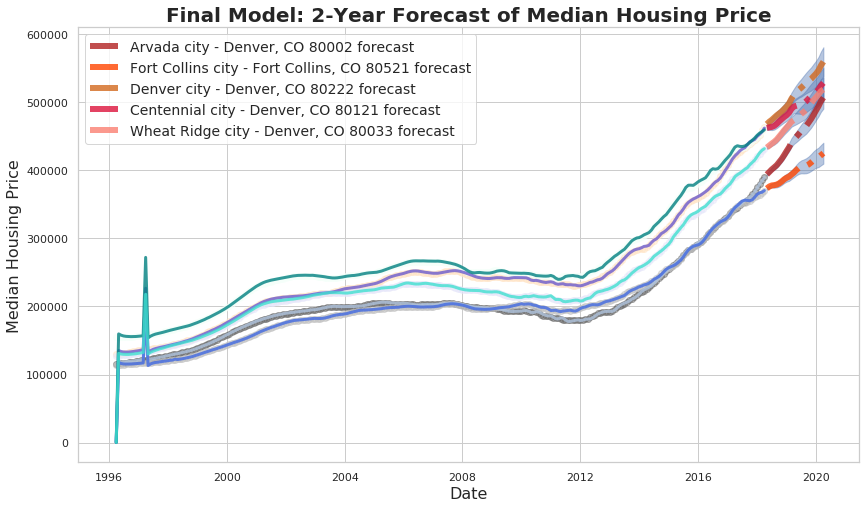

In [32]:
# plot the fit between data and model predictions
fig, ax = plt.subplots(figsize=(14, 8))
zc = list(final_model.keys())
d_col = ['dimgray', 'silver', 'bisque', 'mintcream', 'lavender']
m_col = ['lightsteelblue', 'royalblue', 'slateblue', 'teal', 'turquoise']
f_col = ['firebrick', 'orangered', 'chocolate', 'crimson', 'salmon']
forecast_index = pd.date_range(df_ts.index[df_ts.shape[0]-1], periods=25, freq='1M')-pd.offsets.MonthBegin(1)
for i in range(len(final_model.keys())):
  ax.scatter(df_ts[df_ts.ZIP == zc[i]].index, df_ts[df_ts.ZIP == zc[i]].value, color=d_col[i], alpha=0.5)
  ax.plot(df_ts[df_ts.ZIP == zc[i]].index, final_preds[zc[i]], color=m_col[i], alpha=0.8, linewidth=3, linestyle='-')
  ax.plot(forecast_index[1:], forecast_preds[zc[i]], alpha=0.8, color=f_col[i], linewidth=6, linestyle='-.', label=location_dict.get(zc[i])+' forecast')
  ax.fill_between(forecast_index[1:], forecast_cint[zc[i]][:, 0], forecast_cint[zc[i]][:, 1], alpha=0.4, color='b')
  ax.set_title('Final Model: 2-Year Forecast of Median Housing Price', fontsize=20, fontweight='bold')
  ax.set_ylabel('Median Housing Price', fontsize=16)
  ax.set_xlabel('Date', fontsize=16)
  ax.legend(prop={'size':14});


The plot above shows the forecast for median housing prices over the next two years for the five ZIP Codes we recommended for investment. Due to the long time series from which these models were built, the confidence intervals are relatively tight around the predictions. This provides a close range of prices for Gygax Real Estate to use when considering whether to investment in new properties in these areas.

The final step in this phase is to quantify the forecast for the top 5 ZIP Codes.

In [35]:
# final model statistics
df_fm = pd.DataFrame(columns=['Location', 'CI_LowerBound_Mean', 'CI_LowerBound_Std', 'Prediction_Mean', 'Prediction_Std', 'CI_UpperBound_Mean', 'CI_UpperBound_Std'], index=range(0, 5))
for i in range(len(zc)):
  df_fm.Location[i] = location_dict.get(zc[i])
  df_fm.CI_LowerBound_Mean[i] = np.mean(forecast_cint[zc[i]][:, 0])
  df_fm.CI_LowerBound_Std[i] = np.std(forecast_cint[zc[i]][:, 0])
  df_fm.Prediction_Mean[i] = np.mean(forecast_preds[zc[i]])
  df_fm.Prediction_Std[i] = np.std(forecast_preds[zc[i]])
  df_fm.CI_UpperBound_Mean[i] = np.mean(forecast_cint[zc[i]][:, 1])
  df_fm.CI_UpperBound_Std[i] = np.std(forecast_cint[zc[i]][:, 1])
df_fm.sort_values(by='Prediction_Mean', ascending=False)



Location  ... CI_UpperBound_Std
2              Denver city - Denver, CO 80222  ...           33059.4
3          Centennial city - Denver, CO 80121  ...           25785.3
4         Wheat Ridge city - Denver, CO 80033  ...           30608.2
0              Arvada city - Denver, CO 80002  ...             38349
1  Fort Collins city - Fort Collins, CO 80521  ...           19884.7

[5 rows x 7 columns]

Four of the five ZIP Codes recommended to Gygax Real Estate for investment are located in Denver, Colorado. These ZIP codes correspond to Denver City (80222), Centennial City (80121), Wheat Ridge City (80033), and Arvada City (80002). The fifth ZIP Code is in Fort Collins City (80521), located in Fort Collins, Colorado. 

Final models built from available data have been used to produce forecasts of median housing prices over the next two years. The average prediction is highest for Denver City at \\$510,217 ± \\$8,414.60. This is followed by Centennial City at \\$491,279 ± \\$8,280.73; Wheat Ridge City at \\$474,621 ± \\$11,287.80; Arvada City at \\$445,946 ± \\$12,041.40; and, with the lowest prices, Fort Collins at \\$397,523 ± \\$9.454.27.


[[table of contents]](#Table-of-Contents:)


## 9. Conclusion

Time series analysis skills have been applied to complete a real-world modeling task. The focus of this task was to forecast real estate prices of zipcodes using data from Zillow. Through careful consideration of company desires and restrictions, thoughtful recommendations have been developed with attention given to their quality. The result is the top 5 best ZIP Codes in which Gygax Real Estate should invest.

### ZIP Code Recommendations:

#### **1. Denver city - Denver, CO 80222**
##### Model:  
- AIC = 3,795
- Train RMSE = 1.0e8
- Test RMSE = 3.3e7
- Coefficients = ar.L1, ma.L1, ar.S.L12 (significant)

##### 2-YR Forecast:
- Average Median Housing Price = \\$510,217 ± \$8,414.60

#### **2. Centennial city - Denver, CO 80121**
##### Model: 
- AIC = 3,884
- Train RMSE = 1.5e8
- Test RMSE = 6.1e7
- Coefficients = ar.L1, ma.L1 (significant)

##### 2-YR Forecast:
- Average Median Housing Price = \\$491,279 ± \$8,280.73

#### **3. Wheat Ridge city - Denver, CO 80033**
##### Model:
- AIC = 3,776
- Train RMSE = 9.8e7
- Test RMSE = 7.7e7
- Coefficients = ar.L1, ma.L1 (significant)

##### 2-YR Forecast:
- Average Median Housing Price = \\$474,621 ± \$11,287.80

#### **4. Arvada city - Denver, CO 80002**
##### Model: 
- AIC = 3,693
- Train RMSE = 7.9e7
- Test RMSE = 1.9e7
- Coefficients = ar.L1, ma.L1 (significant)

##### 2-YR Forecast:
- Average Median Housing Price = \\$445,946 ± \$12,041.40

#### 5. **Fort Collins city - Fort Collins, CO 80521**
##### Model:
- AIC = 3,667
- Train RMSE = 7.5e7
- Test RMSE = 2.7e7
- Coefficients = ar.L1, ma.L1 (significant)

##### 2-YR Forecast:
- Average Median Housing Price = \\$397,523 ± \$9.454.27


### Interpretation:

Forecasts show linear growth is expected for each of the top 5 ZIP codes in the next two years. The confidence intervals around the median housing price predictions support this conclusion.
Investment in these locations is expected to return steady growth in the near future.


### Areas of Improvement:
If this investigation were conducted again these items should be considered.
- Apply techniques to remove or reduce heteroscedasticity.
- Increase the grid search of SARIMA hyperparameters.
- Incorporate additional data sources with information on income, taxes, demographics, environment, education, quality of life, and cost of living.


[[table of contents]](#Table-of-Contents:)


_____________________________________________________________
# REFERENCE

# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='~/../images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='~/../images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

# Step 2: Data Preprocessing

In [0]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[1:], format='%Y-%m')

# Step 3: EDA and Visualization

In [0]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

# Step 4: Reshape from Wide to Long Format

In [0]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

# Step 5: ARIMA Modeling

# Step 6: Interpreting Results